<a href="https://colab.research.google.com/github/iamNirmeshGupta/Netflix-Movies-And-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering_Nirmesh_Gupta_Unsupervised_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies And TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

###**Problem**
This dataset consists of TV Shows and Movies available on Netflix as of 2019. The dataset is collected from flixable which is a third-party Netflix search engine. 
The tak in this project was to perform Exploratory Data Analysis on the dataset and clustering similar content by matching text based features.

###**Approach**

Initially, in the first step, I imported the data set to carry out the analysis over the data set to comprehend the details of available data and Checked for Null values and treated them. Here, I found more than 30% null values in the director's column and some null values in cast, country, date_added and rating column as well. Then, I took appropriate actions to take care of the null values. \

Next, I performed Exploratory data analysis on the dataset and tried to get the understanding of the data and how the content is distributed in the dataset, its type and details such as which countries are watching more and which type of content is in demand etc. has been analyzed in this step with the help of visualization graph by getting insights from analysis. \

After the EDA, the next step was Data Preprocessing. Here, first I decided to cluster the data using features: 'director', 'cast', 'country', 'genre', 'rating', and 'description'. In the text preprocessing part, first I removed non-ASCII character from the text column. Then I removed the punctuations, stopwords from the text, followed by, text normalization, tokenisation and text vectorization with TFIDF vectorizer. \

After text preprocessing, first I implemented K-Means Clustering to cluster the data. Here, I used Elbow method and silhouette score to get best optimal number of clusters. Both of these gave methods gave optimal number of clusters as 6.

Then I used Agglomerative clustering to cluster the text which is a type of Hierarchical Clustering. Here I used dendogram to get best number of clusters, which gave 13 clusters as result. \

Lastly, A Content Based Movie Recommender system was built using the similarity matrix obtained through Cosine Similarity. This recommender system will give top 10 recommendations based on the Movie or TV Show searched by the user.

# **GitHub Link -**

https://github.com/iamNirmeshGupta/Netflix-Movies-And-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis. 

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
# Importing the Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

df_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alma better/NETFLIX MOVIES AND TV SHOWS CLUSTERING/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df_original.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_original.shape

(7787, 12)

The dataset has 7787 rows and 12 columns.

### Dataset Information

In [ ]:
# Dataset Info
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


The data type of most of the features is object type and we can see, there are some null values in "director", "cast", "country", "date added", and "rating" features.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(df_original[df_original.duplicated()])

0

There are no duplicate records in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df_original.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


* 2389 nulls in 'director'
* 718 in 'cast'
* 507 in 'country'
* 10 in 'date_added'
* 7 in rating

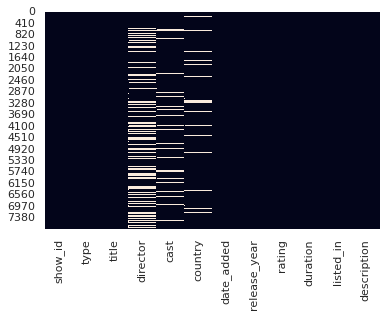

In [ ]:
# Visualizing the missing values
sns.heatmap(df_original.isnull(), cbar=False)

### What did you know about your dataset?

The dataset is collected from Flixable which is a third-party Netflix search engine. This dataset consists of tv shows and movies available on Netflix as of 2019. \
My task is to do the EDA on the dataset to derive some key insights and clustering similar content by matching text based features. \
The dataset has 7787 rows and 12 columns. There are no duplicate records, but, there are some missing values in a few features which needs to be looked at.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_original.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df_original.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 


1. **show_id :** Unique ID for every Movie / Tv Show

2. **type :** Identifier - A Movie or TV Show

3. **title :** Title of the Movie / Tv Show

4. **director :** Director of the Movie

5. **cast :** Actors involved in the movie / show

6. **country :** Country where the movie / show was produced

7. **date_added :** Date it was added on Netflix

8. **release_year :** Actual Releaseyear of the movie / show

9. **rating :** TV Rating of the movie / show

10. **duration :** Total Duration - in minutes or number of seasons

11. **listed_in :** Genere

12. **description :** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_original.columns.tolist():
  print("No. of unique values in ",i," is",df_original[i].nunique(),".")

No. of unique values in  show_id  is 7787 .
No. of unique values in  type  is 2 .
No. of unique values in  title  is 7787 .
No. of unique values in  director  is 4049 .
No. of unique values in  cast  is 6831 .
No. of unique values in  country  is 681 .
No. of unique values in  date_added  is 1565 .
No. of unique values in  release_year  is 73 .
No. of unique values in  rating  is 14 .
No. of unique values in  duration  is 216 .
No. of unique values in  listed_in  is 492 .
No. of unique values in  description  is 7769 .


In [ ]:
# Creating a copy of the dataframe for further analysis
df = df_original.copy()

## 3. ***Data Wrangling***

### **Handling Null Values** 
As we saw, there are many missing values in "director", "cast", "country", "date added", and "rating" features. \


*   **The missing values in director, cast and country attributes can be replaced with 'unknown'.**

*   **10 records with missing values in the date_added column can be dropped.**


*   **The missing values in rating can be imputed by its mode, since this attribute is discrete.**



In [ ]:
# Handling Null Values
# Replacing nulls with 'unknown'
df[['director','cast','country']] = df[['director','cast','country']].fillna('unknown')

# Imputing null values in rating with its mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping remaining 10 records with null values in date_added column
df.dropna(axis = 0, inplace=True)

In [ ]:
# Checking null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Checking dataset shape
df.shape

(7777, 12)

**We have successfully handled all the missing values in the dataset.**

##**Country**


In [ ]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

##**listed_in**

In [ ]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64



*   There are some movies/TV shows that were filmed in multiple countries and have multiple genres associated with it.
*   To simplify the analysis, let's consider only the primary country where that respective movie/TV show was filmed.

*   Also, let's consider only the primary genre of the respective movie/TV show.


*   Morever, I will be renaming 'listed_in' column to 'genres'.





In [ ]:
# Choosing the primary country and primary genre

df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

# Renaming 'listed_in' to 'genre'
df.rename(columns = {'listed_in':'genres'}, inplace=True)

In [ ]:
# Primary countries where movies and TV shows were shot

df.country.value_counts()

United States     2877
India              956
United Kingdom     576
unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
# Primary genres of the movies and TV shows

df.genres.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

###**Typecasting "duration" from string to integer**

In [ ]:
# Splitting the duration column and changing its data type to integer,
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for TV shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [ ]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [ ]:
# Data type of duration

df.duration.dtype

dtype('int64')

**We have successfully converted the data type of duration column to integer.**

###**Typecasting "date_added" from string to datetime**

In [ ]:
# Type casting date_added to datetime

df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# First and last date on which a show was added on netflix

df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

**The shows were added on netflix between 1st January 2008 to 16th January 2021.**

In [ ]:
# Adding new attributed of Month and Year of date added

df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

We can now drop "date_added" column as it is no longer needed.

In [ ]:
# Dropping date_added

df.drop('date_added', axis = 1, inplace=True)

In [ ]:
# Checking the dataframe again
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration                  genres  \
0          2020  TV-MA         4  International TV Shows   
1          2016  TV-MA        93                  Dramas   
2          2011      R        78           Horror Movies   
3          2009  PG-13        80      Action & Adventure   
4          2008  PG-13       123                  Dramas   

                                         description  month  year  
0  In a future where the elite inhabit an island ...      8  2020  
1  After a devastating earthquake hits Mexico Cit...     12  2016  
2  When an army recruit is found dead, his fellow...     12  2018  
3  In a postapocalyptic world, rag-doll robots hi...     11  2017  
4  A brilliant group of students become card-coun...      1  2020

###**Rating** 

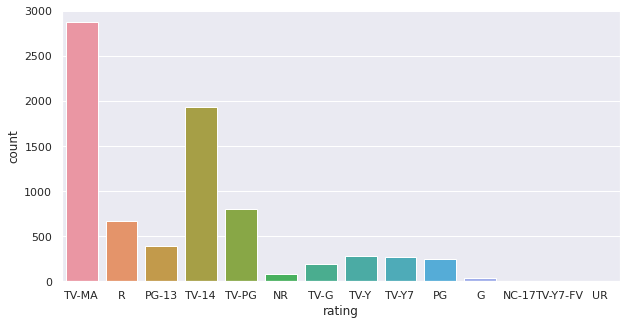

In [ ]:
# Age ratings count plot

plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df)

**Higest number of shows in Netflix are rated as TV-MA and TV_14. But it's not clear what these terms mean. After searching online, these can be changed to age restrictions that apply on certain movies and TV shows.** \
[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

In [ ]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Changing the values in the rating column

rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

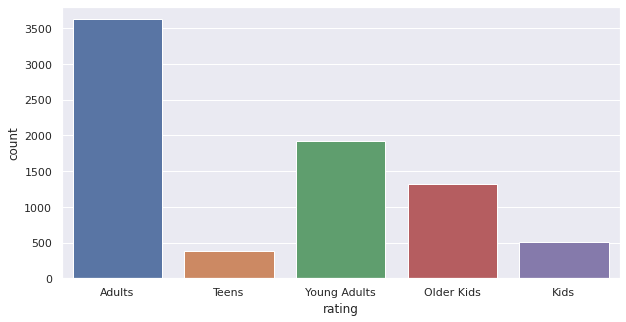

In [ ]:
# Age ratings for shows in the data
plt.figure(figsize=(10,5))
sns.countplot('rating', data=df)

### What all manipulations have you done and insights you found?



*   **There were some missing values in 'director', 'cast', 'country', 'rating', and 'date_added' columns. I have replaced the missing values in 'director', 'cast' and 'country' columns with 'unknown', missing values in 'rating' column with mode and dropped other records with missing values.**

*   **There were some movies/Tv shows that were filmed in multiple countries and have multiple genres associated with them. I have removed other contries and genres and only taken the primary countries where the shows were filmed and primary genres.**


*   **I have renamed 'listed_in' column to 'genres'.**



*   **I have changed the data type of the 'duration' column from string to integer.**

*   **I have changed the data type of 'date_added' column from string to datetime. Further I have formed two new columns namely 'year' and 'month' which represent year and month when the show was added and then dropped the 'date_addded' column.**
*   **Lastly, the 'rating' column had some terms which are widely used to rate movies and TV shows. After searching online, I have replaced these terms with understandable terms.**




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Univariate Analysis**

#### Chart - 1 - 'type' - Pie Chart on 'type' column

Text(0.5, 1.0, 'Movies & TV Shows in the dataset')

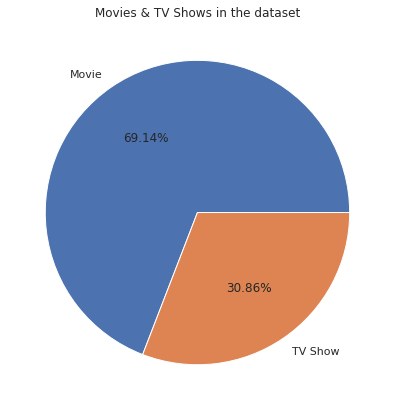

In [ ]:
# Chart - 1 No. of movies and TV shows in the  dataset

plt.figure(figsize=(7,7))
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies & TV Shows in the dataset')



##### 1. Why did you pick the specific chart?

**A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I have used pie chart, which helped me to plot the percentage of movies and TV show counts.**

##### 2. What is/are the insight(s) found from the chart?

**There are more movies(69.14%) as compared with TV Shows(30.86%) in the dataset.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**There are more number of movies as compared to the TV shows on Netflix. So if we look at the complete dataset, Netflix has focused more on movies. The focus of interest might have changed over the years. This we will see  in the further analysis.** 

#### Chart - 2 - 'director' -  Count plot for top 20 Directors for Movies/TV Shows

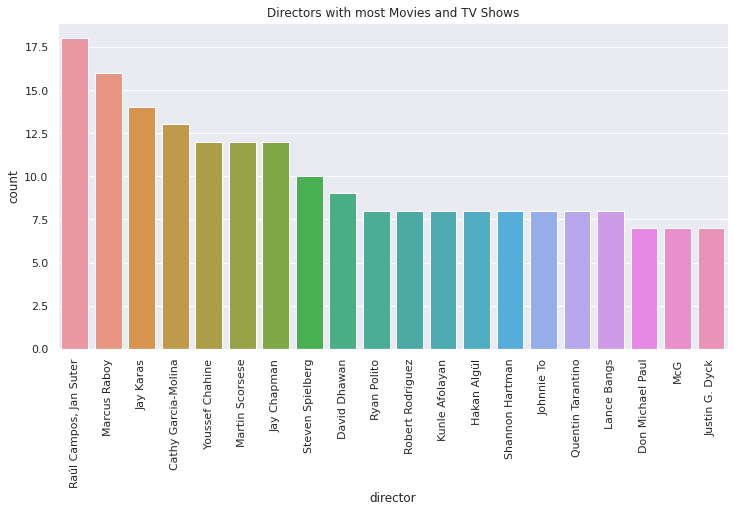

In [ ]:
# Chart - 2 - Plot for director

plt.figure(figsize=(12,6))
sns.countplot(x='director',data=df,order=df[~(df['director']=='unknown')].director.value_counts().head(20).index)
plt.title('Directors with most Movies and TV Shows')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

**The countplot is used to represent the occurence(counts) of the observation present in the categorical variable. It uses the concept of bar chart for the visualisation. So I have used the countplot, which helped me to represent the count of top 20 directors.**

##### 2. What is/are the insight(s) found from the chart?

**Raul Campos and Jan Suter have together directed 18 movies, more than  anyone else.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These 20 directors have directed most number of movies/Tv shows over the  years, so these directors have been the top choices of movie/tv shows producers to direct there movies.**

#### Chart - 3 - 'title' - Wordcloud for 'title' column

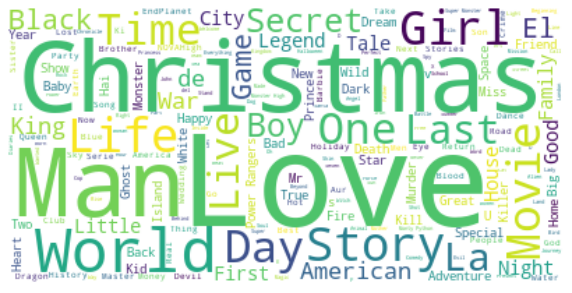

In [ ]:
# Chart - 3 Wordcloud for 'title'

#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##### 1. Why did you pick the specific chart?

**Word Cloud is a data visualisation technique used for reperesenting text data in which the size of each word indicates its frequency or importance. Significant textual data points are highlighted using a word cloud. So I have used Word Cloud here to highlight the most frequent words that come in movie or TV show titles.**

##### 2. What is/are the insight(s) found from the chart?

**Words like World, Love, Christmas, Man, Life appear the most in all the title. It's strange how the word Christmas has appeared in most number of movie titles.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**I don't think the gained insights from this plot will create any positive business impact.**

#### Chart - 4 - Country - Bar Plot for top 10 countries

Text(0.5, 1.0, 'Top 10 countries with highest number of shows')

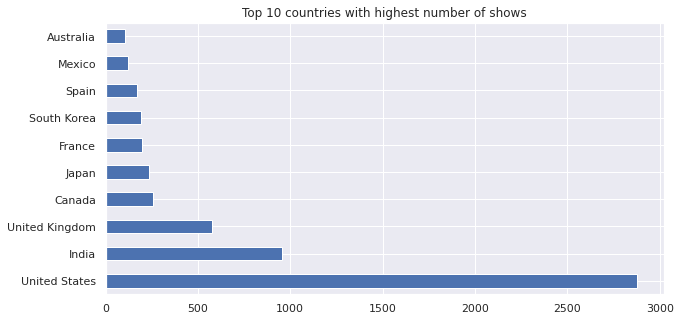

In [ ]:
# Chart - 4 Top 10 countries with highest number of Movies/TV Shows

plt.figure(figsize=(10,5))
df[~(df['country']=='unknown')].country.value_counts().head(10).plot(kind = 'barh')
plt.title("Top 10 countries with highest number of shows")

##### 1. Why did you pick the specific chart?

**Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.** \
**I have used bar chart to show the total count of Movies/TV Show productions for top 10 countries.**

##### 2. What is/are the insight(s) found from the chart?

**United States, India, United Kingdom are top 3 countries for Movies and Tv shows on Netflix.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can use this column when we cluster the Movies and TV shows based on their country of origin.**

#### Chart - 5 - 'cast' - Bar Plot for 'cast' column

In [ ]:
# Chart - 5 - Top Actors with highest count of movies

# Convert Cast to get a dataframe of individual actors
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(df['cast'])
  for i in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[i]).split(","))
  for i in cast_count_final:
    if i not in cast_count:
      cast_count[i] = cast_count_final.count(i)
  return cast_count


In [ ]:
# Storing the cast_count dictionary in a separate dataframe

cast_df = convert_to_list(df)
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns = ['count'])

# Highest number of movies for actors

casts_df.sort_values('count', ascending=False).drop('unknown')

count
 Anupam Kher            38
 Takahiro Sakurai       28
Shah Rukh Khan          27
 Om Puri                27
 Boman Irani            25
...                    ...
 Ana-María Sánchez       1
 Orlando Valenzuela      1
 Ricardo Mejia           1
 Juan Manuel Diaz        1
 Rachel Khoo             1

[35338 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

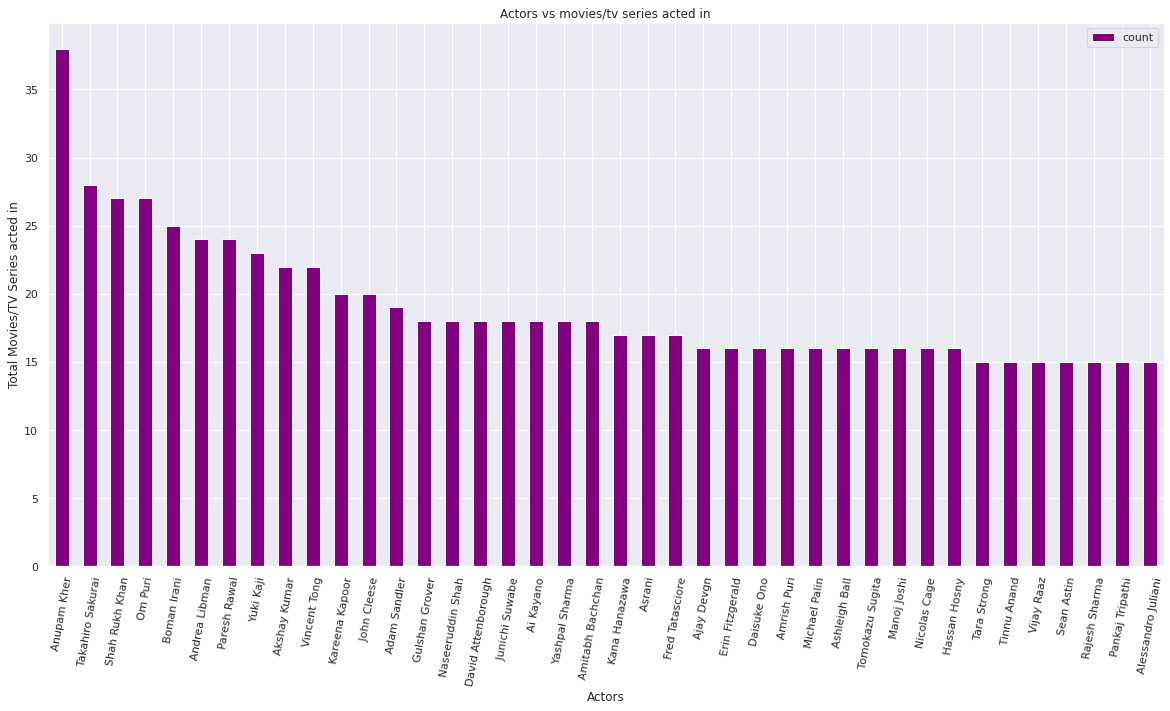

In [ ]:
# Plot for top 10 actors in Movies/TV Shows

plt.rcParams["figure.figsize"] = (20, 10)
casts_df.sort_values('count', ascending=False).drop('unknown').head(40).plot(kind='bar', color='purple')
plt.xlabel("Actors")
plt.ylabel("Total Movies/TV Series acted in")
plt.title("Actors vs movies/tv series acted in")
plt.xticks(rotation=80)

##### 1. Why did you pick the specific chart?

**Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.** \
**I have used the bar chart to show the count of top 40 actors who have acted in most number of Movies/TV Shows.**

##### 2. What is/are the insight(s) found from the chart?

**Although the number of Movies/TV shows which originate from United States are more than double than that from India, the most number of actors(almost 50%) in top 40 actors list are Indian, with Anupam Kher topping the list.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The cast feature can be used for further clustering based on the actors of the shows.**

#### Chart - 6 - 'genres' - Bar pot for 'genres'

Text(0.5, 1.0, 'Top 10 genres')

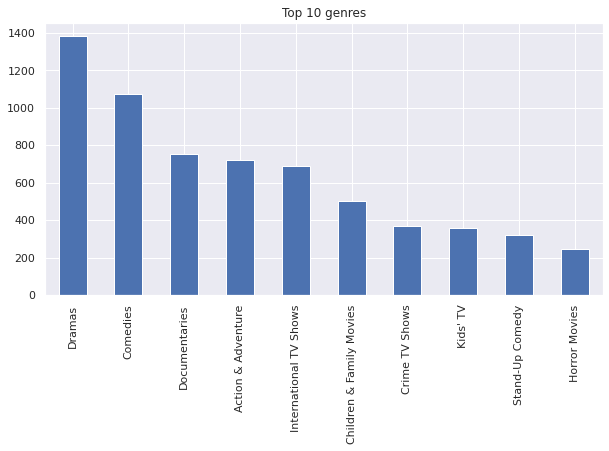

In [ ]:
# Chart - 6 - Top 10 genres

plt.figure(figsize=(10,5))
df.genres.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

In [ ]:
# Share of top 3 genres
df.genres.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [ ]:
# Share of top 10 genres
df.genres.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

##### 1. Why did you pick the specific chart?

**Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.** \
**I have used bar chart to show the count of top 10 genres.**

##### 2. What is/are the insight(s) found from the chart?



*   **Dramas is the most popular genre followed by comedies and documentries.**

*   **These 3 genres account for 41% of all movies and TV shows, while top 10 genres account for 82% of all movies and TV shows.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Genres feature too can be used for clustering based on different genres.**

#### Chart - 7 - 'release_year' - Countplot for 'release_year'

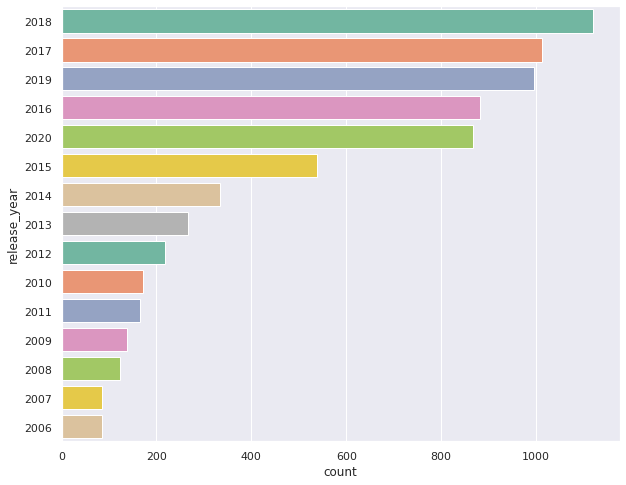

In [ ]:
# Chart - 7 Count plot for release over years
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df, palette='Set2', order=df.release_year.value_counts().index[0:15])

In [ ]:
# Share of recently released Movies/TV Shows
df['release_year'].value_counts().nlargest(5).sum()/len(df)*100

62.71055676996271

##### 1. Why did you pick the specific chart?

**The countplot is used to represent the occurence(counts) of the observation present in the categorical variable. It uses the concept of bar chart for the visualisation. I have used the count plot to represent the number of movies/tv shows released over the years.**

##### 2. What is/are the insight(s) found from the chart?



*   **Netflix has greater number of Movies/TV shows than older ones.**
*   **Infact, Movies/TV Shows released from 2014 to 2018 account for 62% of total shows available on Netflix.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Release_year column can also be used in clustering based on newer movies and older movies.**

#### Chart - 8 - 'year' - Countplot for 'year' Column

Text(0.5, 0, '')

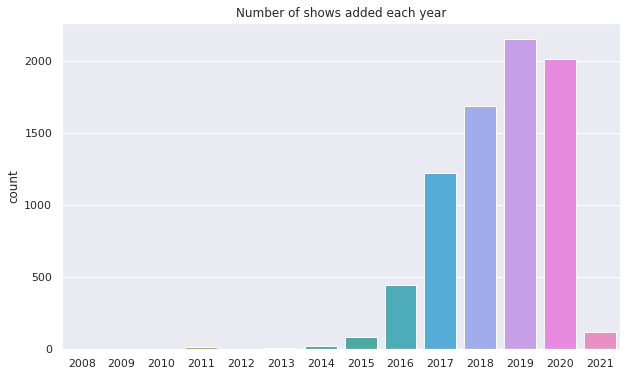

In [ ]:
# Chart - 8 Number of shows added over the years
plt.figure(figsize=(10,6))
sns.countplot(df['year'])
plt.title('Number of shows added each year')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

**The countplot is used to represent the occurence(counts) of the observation present in the categorical variable. It uses the concept of bar chart for the visualisation. I have used the count plot to show the count of Movies/TV shows added over the years on Netflix.**

##### 2. What is/are the insight(s) found from the chart?



*   **Netflix continues to add more and more shows on its platform.**

*   **There is a slight decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.**
*   **We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.**





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Netflix continues to add more and more shows on its platform. With significant increase in number of shows and movies being made, and increased access to fast and affordable internet to everyone around the world, these numbers are going to increase more rapidly than ever.**

#### Chart - 9 - 'rating' - Donut plot for 'rating'

In [ ]:

# Creating a dataframe of rating value counts
rating_ = df['rating'].value_counts()
rating_df = pd.DataFrame(rating_).reset_index()
rating_df.columns = ['Age group','count']
rating_df

Age group  count
0        Adults   3624
1  Young Adults   1928
2    Older Kids   1327
3          Kids    512
4         Teens    386

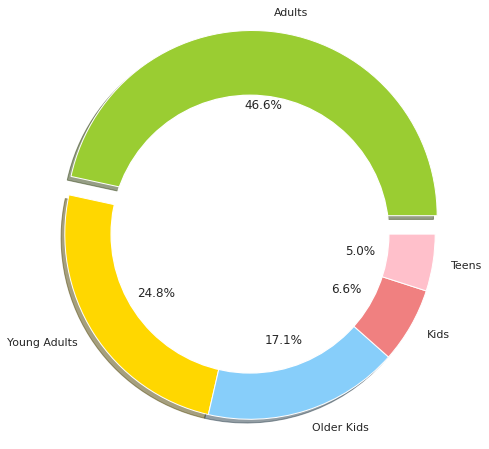

In [ ]:
# Chart - 9 Share of different age groups in the rating column
 
plt.figure(figsize=(8,8))
labels = rating_df['Age group']
sizes = rating_df['count']
colors = ['yellowgreen','gold','lightskyblue','lightcoral','pink']
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='white',fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

**Donut charts are a special kind of Pie Chart with the difference that it has a blank circle at the centre. Each piece of the ring represents the proportion of the whole data series or percentage of total if the whole ring represents 100% of data.** \
**I have used donut chart to represent the percentage share of different age groups in the rating column.**

##### 2. What is/are the insight(s) found from the chart?

**The majority of the shows on Netflix are catered to the needs of adult(46.6%) and young adults(24.8%) population.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**'Rating' column can be used for clustering based on different age groups.**

#### Chart - 10 - 'month' - Countplot for 'month' Column  

Text(0.5, 0, '')

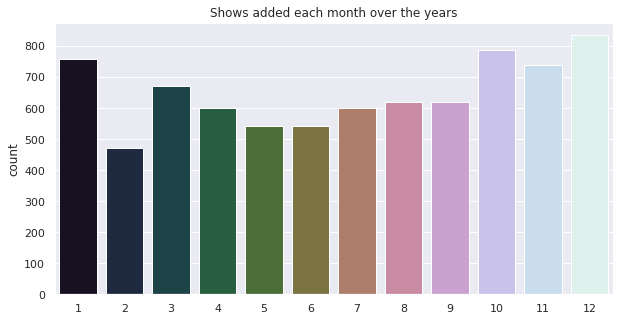

In [ ]:
# Chart - 10 Number of shows added on different months

plt.figure(figsize = (10,5)) 
sns.countplot(df['month'], palette = 'cubehelix')
plt.title('Shows added each month over the years')
plt.xlabel('')


##### 1. Why did you pick the specific chart?

**The countplot is used to represent the occurence(counts) of the observation present in the categorical variable. It uses the concept of bar chart for the visualisation. I have used the count plot to show the count of Movies/TV Shows added each month over the years.**

##### 2. What is/are the insight(s) found from the chart?

**Most of the Shows are added during the holiday season, in months October, November, December and January.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These insights won't help to create any positive business impact.**

#### Chart - 11 - 'description' - Wordcloud for 'description' column

In [ ]:
# Function to plot word cloud

def get_word_cloud(cat_name,cat_column,column_of_choice):
  df_word_cloud = df[[cat_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[cat_column]==cat_name]
  text = ' '.join(word for word in df_word_cloud[column_of_choice])
  # Create stopwords list
  stopwords = set(STOPWORDS)
  # Generate a  wordcloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
  # Display the generated image
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

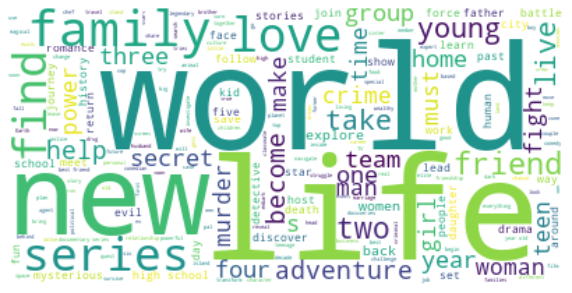

--------------------------------------------------------------------------


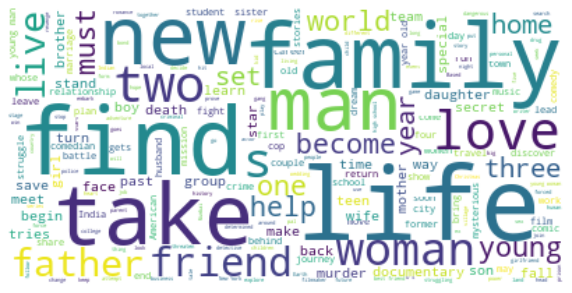

--------------------------------------------------------------------------


In [ ]:
# Chart - 11 Plotting Word cloud for Movies and TV Show description

cat_name = ['TV Show','Movie']
for i in cat_name:
  get_word_cloud(i,'type','description')
  print('-'*74)

##### 1. Why did you pick the specific chart?

**Word Cloud is a data visualisation technique used for reperesenting text data in which the size of each word indicates its frequency or importance. Significant textual data points are highlighted using a word cloud. So I have used Word Cloud here to highlight the most frequent words in the description of movies and tv shows.**

##### 2. What is/are the insight(s) found from the chart?



*   **Words like Life, World, New, Family, Friend, Find, Love, Series etc. appear the most in TV Show description.**
*   **Almost similar words like Find, Family, Life, Love, world, Man, Woman etc. appear most frequently in Movies description also.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**I can't think of any positive impact that these insights might have on business.**

##**Bivariate Analysis**

#### Chart - 12 - 'duration' - KDE Plot for 'duration' Column 

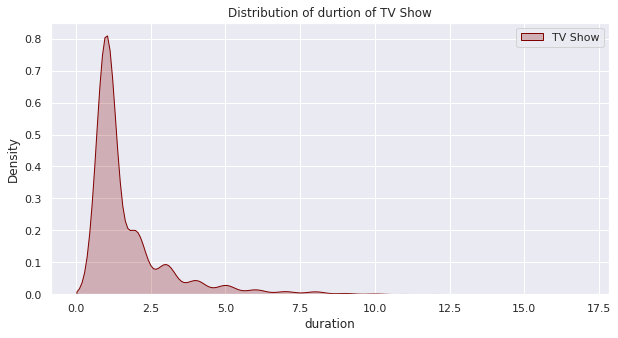

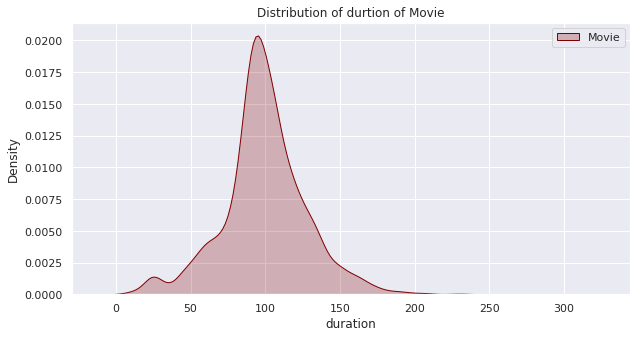

In [ ]:
# Chart - 12 Plot for duration of Movies and TV Shows

for i in list(df['type'].unique()):
  plt.figure(figsize=(10, 5))
  plt.title(f'Distribution of durtion of {i}')
  sns.kdeplot(df.loc[(df['type'] == i), 'duration'], label = i, shade = True, color = 'maroon')
  plt.ticklabel_format(style='plain', axis='x')
  plt.legend()

  plt.show()

##### 1. Why did you pick the specific chart?

**A kernel density estimate(KDE) plot is a method for visualising the distributions of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.**

##### 2. What is/are the insight(s) found from the chart?


*   **Most of the movies are 80-120 minutes long.**
*   **Most of the TV Shows have 1-2 seasons only.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These insights can be used to further analyse if the viewere like to watch TV Shows with lesser number of seasons or shows with higher number of seasons and if the viewership is more for long movies or short movies, provided, if we have the viewership data with us.**

#### Chart - 13 - 'type'/'year' - Countplot for Movies/TV Shows Added Yearly

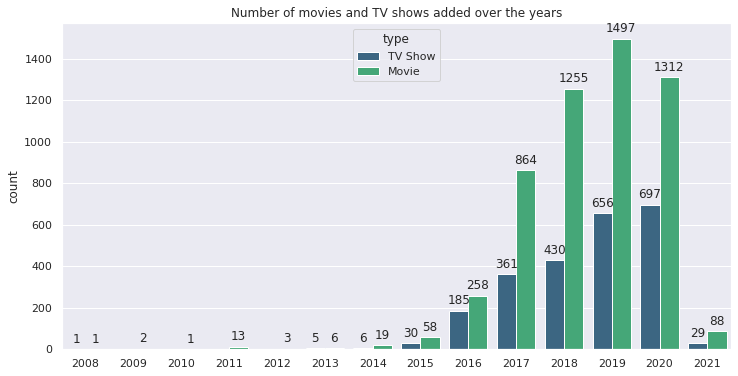

In [ ]:
# Chart - 13 Number of Movies and TV Shows added over the years

plt.figure(figsize=(12,6))
p = sns.countplot(x='year',data=df, hue='type', palette = 'viridis')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

**The countplot is used to represent the occurence(counts) of the observation present in the categorical variable. It uses the concept of bar chart for the visualisation. I have used the count plot to show the count of Movies and TV Shows added each year.**

##### 2. What is/are the insight(s) found from the chart?



*   **Over the years, Netflix has consistently focused on adding more shows in its platform.**

*   **Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.**





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   **The above insights might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.**

#### Chart - 14 - release_year/duration - Lineplot


Text(0.5, 0, 'Year')

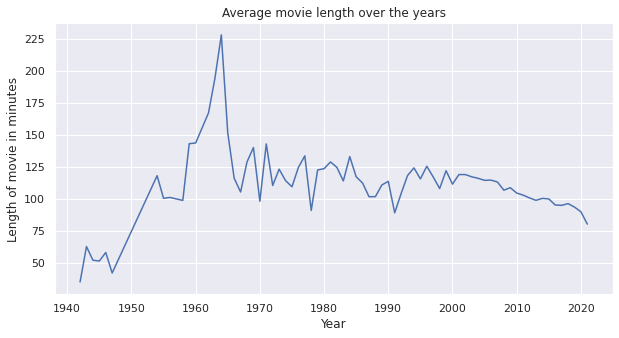

In [ ]:
# Chart - 14 Average movie length over the years

plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

**Line Plots display numeric values on one axis, and categorical values on the other. They can typically be used in much the same way Bar plots can be used, though, they are more commonly used to keep track of changes over time.** \
**I have used line plot to display average length of movies over the years.**

##### 2. What is/are the insight(s) found from the chart?



*   **Netflix has several movies on its site, including those that were released way back in 1942.**

*   **As per the plot, movies made in the 1940s had a fairly short duration on average.**
*   **On average, movies made in the 1960s have the longest movie length.**


*   **The average length of a movie has been continuously decreasing since the 2000s.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Movies being released from last decade are comparatively of shorter duration than earlier. This indicates, long duration movies are no longer popular among people. This might be because of so many TV Shows coming up these days which allow viewers to watch a single episode on the go and not making them to sit and watch the show for 3-4 straight hours.**

#### Chart - 15 - type/genres - Bar Plot


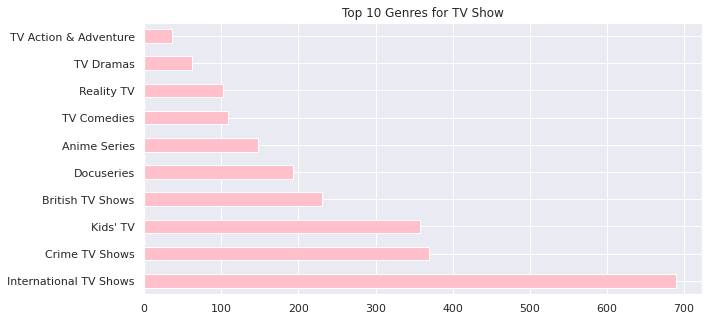

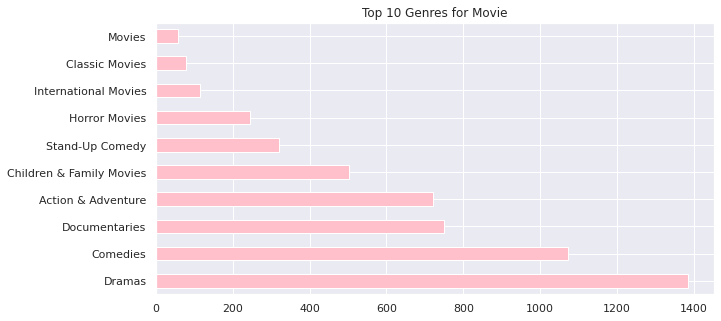

In [ ]:
# Top 10 genres for Movies and TV Shows

for i in list(df['type'].unique()):
  plt.figure(figsize=(10,5))
  df[df['type']==i].genres.value_counts().nlargest(10).plot(kind='barh', color='pink')
  plt.title(f'Top 10 Genres for {i}')

##### 1. Why did you pick the specific chart?

**The countplot is used to represent the occurence(counts) of the observation present in the categorical variable. It uses the concept of bar chart for the visualisation. I have used the count plot to show the count of top 10 genres for Movies and TV Shows.**

##### 2. What is/are the insight(s) found from the chart?



*   **International TV shows, Crime TV Shows and kids TV are top 3 genres for TV Shows.**
*   **Dramas, Comedies and Documentries are top 3 genres for Movies.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These insights can be used for clustering on the basis of genres.**

#### Chart - 16 - rating/movie/duration - Barplot

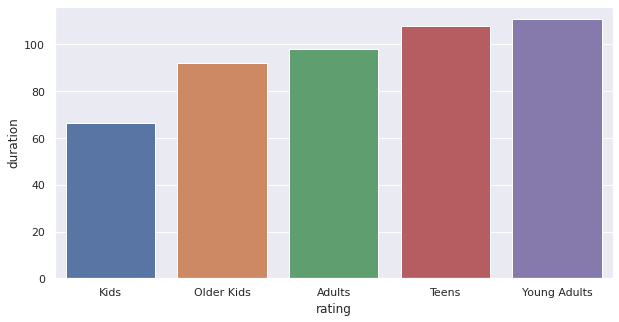

In [ ]:
# Plotting average length of movies on the basis of different age_groups
movie_duration = df[df['type']=='Movie'].groupby('rating').duration.mean()
duration_df = pd.DataFrame(movie_duration).sort_values('duration')
plt.figure(figsize=(10,5))
sns.barplot(x=duration_df.index, y=duration_df.duration, data=duration_df)


##### 1. Why did you pick the specific chart?

**Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.** \
**I have used bar chart to plot average movie length based on different age groups in rating column.**

##### 2. What is/are the insight(s) found from the chart?

**Average length of movies for Young adults and teens is highest, which is around 110 minutes, while  that for kids, the movie average movie length is shortest, which is around 70 minutes.**

#### Chart - 17 - country/type - Bar Plot

<BarContainer object of 11 artists>

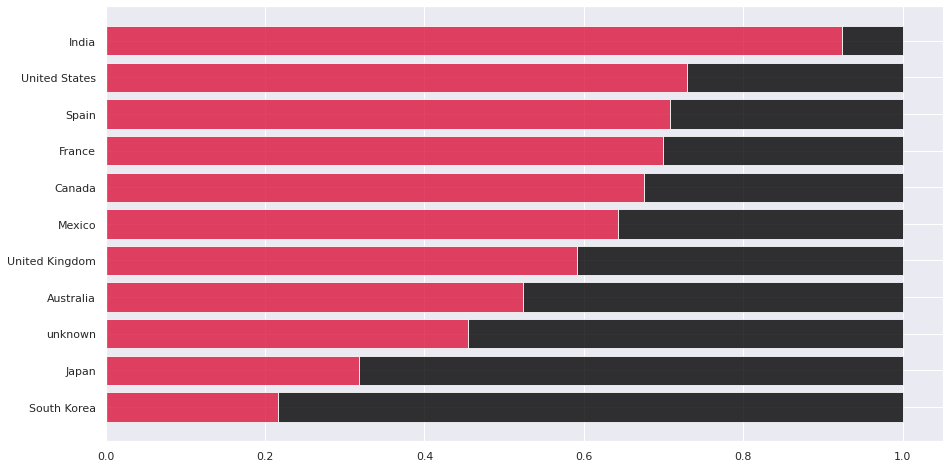

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')


##### 1. Why did you pick the specific chart?

**Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.** \
**I have used bar plot to show the Movie and TV Show ration for top 10 countries in terms of total content.**

##### 2. What is/are the insight(s) found from the chart?




*   **Among top 10 countries, India and United States have highest percentage of movies and small portion of TV Shows. So, the content makers have focused more on Movies as compared with TV Shows.**
*   **While, content makers in South Korea and Japan have focused more on TV Shows rather that Movies with  high proportion of TV Shows as compared with Movies.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These insights can be used in clustering based on country of origin and content type.**

#### Chart - 18 - Correlation Heatmap

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap

country         Canada    France     India     Japan    Mexico  South Korea  \
rating                                                                        
Adults        0.467181  0.627551  0.259414  0.368644  0.764228     0.463918   
Kids          0.150579  0.086735  0.015690  0.008475  0.016260     0.046392   
Older Kids    0.220077  0.112245  0.163180  0.275424  0.089431     0.123711   
Teens         0.027027  0.030612  0.004184  0.012712  0.016260     0.000000   
Young Adults  0.135135  0.142857  0.557531  0.334746  0.113821     0.365979   

country          Spain  United Kingdom  United States   unknown  
rating                                                           
Adults        0.797619        0.526042       0.489051  0.320158  
Kids          0.035714        0.078125       0.074731  0.169960  
Older Kids    0.053571        0.184028       0.196038  0.235178  
Teens         0.017857        0.071181       0.098366  0.005929  
Young Adults  0.095238        0.140625       0.141814  0.268775

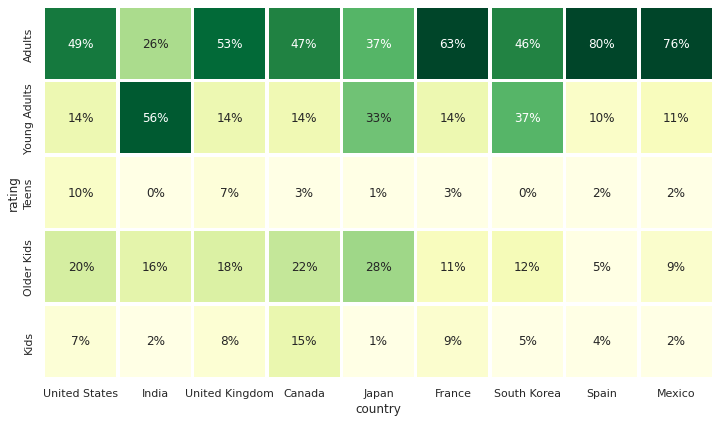

In [ ]:
# Correlation Heatmap visualization code

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Young Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGn",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

# Drop the newly formed 'count' column
df.drop('count',axis = 1, inplace=True)

##### 1. Why did you pick the specific chart?

**Heatmap is a graphical representation of data using colours to visualise the  value of the matrix. In this, to represent more common values, darker colours are preferred.** \
**I have used heatmap to visualize the proportion of different age group content for top 10 countries.**

##### 2. What is/are the insight(s) found from the chart?



*   **The US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan.**

*   **Also, Mexico and Spain have similar content on Netflix for different age groups.**



#### Chart - 19 - Pair Plot 

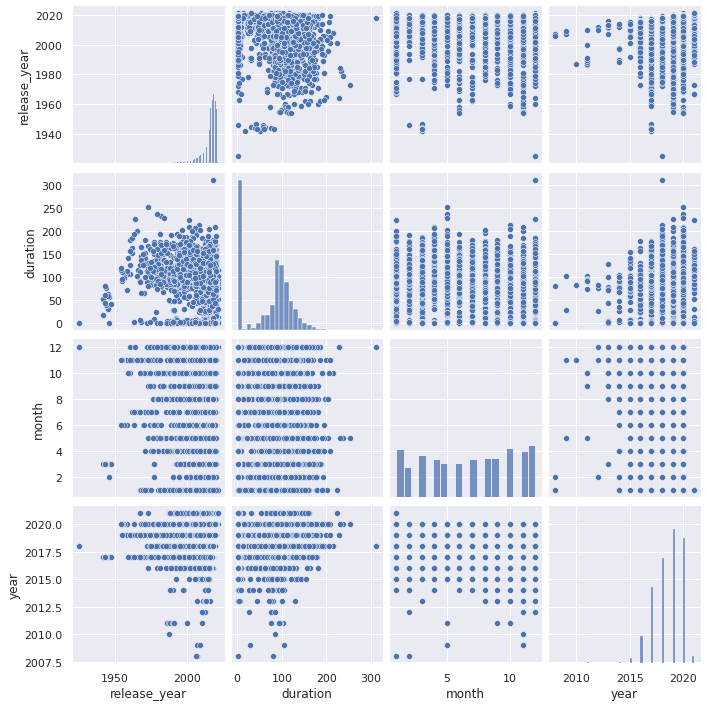

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1.   **Movies rated for kids are not atleast two hours long.**

1.   **Netflix has been focusing more on TV Show than Movies.**






### Hypothetical Statement - 1 - Movies rated for kids are not atleast two hours long.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   **Null hypothesis** - Movies rated for kids are atleast two hours long.(duration >= 120)
*   **Alternate hypothesis** - Movies rated for kids are not atleast two hours long.(duration < 120)



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# making copy of original df
df_hypothesis = df.copy()
# Head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year  rating  duration                  genres  \
0          2020  Adults         4  International TV Shows   
1          2016  Adults        93                  Dramas   
2          2011  Adults        78           Horror Movies   
3          2009   Teens        80      Action & Adventure   
4          2008   Teens       123                  Dramas   

                                         description  month  year  
0  In a future where the elite inhabit an island ...      8  2020  
1  After a devastating earthquake hits Mexico Cit...     12  2016  
2  When an army recruit is found dead, his fellow...     12  2018  
3  In a postapocalyptic world, rag-doll robots hi...     11  2017  
4  A brilliant group of students become card-coun...      1  2020

In [ ]:
# filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
# group_by duration and rating                 
group_by_= df_hypothesis[['duration','rating']].groupby(by='rating')
# mean of group_by variable
group=group_by_.mean().reset_index()
group

rating    duration
0        Adults   98.230769
1          Kids   66.486891
2    Older Kids   92.024648
3         Teens  107.772021
4  Young Adults  110.709119

In [ ]:
# In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
# mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

# Degree of Freedom
dof = n1+n2-2
print('dof',dof)

# Pooled estimate of the common standard deviation
sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
# t-distribution
print(stats.t.ppf(0.025,dof))

# t-distribution
print(stats.t.ppf(0.975,dof))
     


-1.9620900365868952
1.9620900365868947


**Because the t-value is not in the range, the null hypothesis is rejected.**

**As a result, movies rated for kids and older kids are not at least two hours long.**

##### Which statistical test have you done to obtain P-Value?

**I have used t-test statistical testing to obtain p-value and found the result that the null hypothesis is rejected and the movies rated for kids are not atleast two hours long.**

##### Why did you choose the specific statistical test?

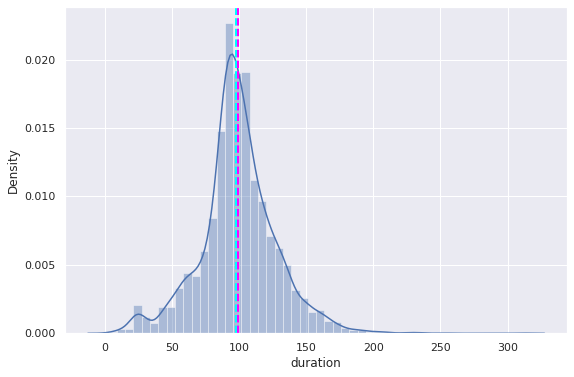

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (df_hypothesis["duration"])
sns.distplot(df_hypothesis["duration"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('')
plt.show()

**From the above plot, we can see that duration column is normally distributed with a little positive skew and a small difference between the mean and the median. So I have used t-test to calculate p-value.**

### Hypothetical Statement - 2 - Netflix been focusing more on TV Shows rather than Movies in recent years

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Netflix has been focusing more on TV Shows rather than Movies.
Alternate Hypotheisis: Netflix has not been focusing more on TV Shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Number of shows added every year
shows_added_year_wise_df = df[df['type']=="TV Show"].groupby(['year']).agg({'show_id':'count'})
shows_added_year_wise_df.reset_index(inplace=True)
shows_added_year_wise_df

year  show_id
0  2008        1
1  2013        5
2  2014        6
3  2015       30
4  2016      185
5  2017      361
6  2018      430
7  2019      656
8  2020      697
9  2021       29

In [ ]:
# Adding a new column for Percent increase in shows being added each year
shows_added_year_wise_df['change'] = shows_added_year_wise_df['show_id'].pct_change()
shows_added_year_wise_df

year  show_id    change
0  2008        1       NaN
1  2013        5  4.000000
2  2014        6  0.200000
3  2015       30  4.000000
4  2016      185  5.166667
5  2017      361  0.951351
6  2018      430  0.191136
7  2019      656  0.525581
8  2020      697  0.062500
9  2021       29 -0.958393

In [ ]:
# Average percentage increase each year for shows
shows_avg_increase = shows_added_year_wise_df['change'][1:].mean()

In [ ]:
# Number of Movies added each year
movies_added_year_wise_df = df[df['type']=="Movie"].groupby(['year']).agg({'show_id':'count'})
movies_added_year_wise_df.reset_index(inplace=True)
movies_added_year_wise_df

year  show_id
0   2008        1
1   2009        2
2   2010        1
3   2011       13
4   2012        3
5   2013        6
6   2014       19
7   2015       58
8   2016      258
9   2017      864
10  2018     1255
11  2019     1497
12  2020     1312
13  2021       88

In [ ]:
# Adding a new column for percentage increase in movies being added each year
movies_added_year_wise_df['change'] = movies_added_year_wise_df['show_id'].pct_change()
movies_added_year_wise_df

year  show_id     change
0   2008        1        NaN
1   2009        2   1.000000
2   2010        1  -0.500000
3   2011       13  12.000000
4   2012        3  -0.769231
5   2013        6   1.000000
6   2014       19   2.166667
7   2015       58   2.052632
8   2016      258   3.448276
9   2017      864   2.348837
10  2018     1255   0.452546
11  2019     1497   0.192829
12  2020     1312  -0.123580
13  2021       88  -0.932927

In [ ]:
# Average percentage increase each year
movie_avg_increase = movies_added_year_wise_df['change'][1:].mean()

In [ ]:
# Comparing the average increase for movies and shows

print(f'Average percentage increase in TV Shows added each  year on Netflix: {shows_avg_increase}')
print(f'Average percentage increase in Movies added each year on Netflix: {movie_avg_increase}')

Average percentage increase in TV Shows added each  year on Netflix: 1.5709824482328867
Average percentage increase in Movies added each year on Netflix: 1.7181575542861187


##### Which statistical test have you done to obtain P-Value?

**I have not used any statistical test here. I have only used basic pandas operations and found the result that, Netflix has added Movies on its platform with an average percentage increase of 1.72% each year and has added shows with average percentage increase of 1.57 each year. So we can say, Netflix has not been focusing more on TV Shows rather that Movies and has been focusing almost equally on both types of content. So the null hypothesis is rejected.** 

##### Why did you choose the specific statistical test?

**I have not used any statistical test here and only used basic pandas operations.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were many missing values in "director", "cast", "country", "date added", and "rating" features. \


*   **The missing values in director, cast and country attributes have been replaced with 'unknown'.**

*   **10 records with missing values in the date_added column were dropped, since 10 records are very small proportion of the large dataset we have and we will not be losing much information.**


*   **The missing values in rating are imputed by its mode, since this attribute is discrete.**

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

###**We will cluster the shows on Netflix based on following attributes:**



*   Director

*   Cast

*   Country
*   Listed_in(Genres)


*   Description


*   Rating




In [ ]:
# Using the original dataset for clustering since it does not require handling missing values
df1 = df_original.copy()

In [ ]:
# Fill missing values with empty string
df1.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column
df1['filtered'] = df1['description'] + ' '+ df1['listed_in'] + ' ' + df1['rating'] + ' '+ df1['country']+ ' ' + df1['cast'] + ' '+ df1['director']

#### 1. Remove Non-ASCII Characters

In [ ]:
# Function to remove non- ASCII characters
def remove_non_ascii(text):
  '''
  this function removes the non-ascii characters from the text
  '''
  new_words = []
  for word in text:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [ ]:
# Applying the function to the text column
df1['filtered'] = remove_non_ascii(df1['filtered'])

In [ ]:
# Checking the updated text
df1['filtered'][40]

'The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall. Comedies, International Movies TV-14 Turkey Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Muharrem Gulmez'

**We have successfully removed all non-ascii characters.**

#### 2. Lower Casing

In [ ]:
# Lower Casing
df1['filtered' ]= df1['filtered'].str.lower()


In [ ]:
# Checking the  updated text
df1['filtered'][40]

'the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall. comedies, international movies tv-14 turkey erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman muharrem gulmez'

**We have successfully converted the text to lower case.**

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuations
df1['filtered'] = df1['filtered'].apply(remove_punctuation)

In [ ]:
# Checking updated text
df1['filtered'][40]

'the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall comedies international movies tv14 turkey erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman muharrem gulmez'

**We have successfully removed all punctuation marks.**

#### 4. Removing Stopwords

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Remove stop words
df1['filtered'] = df1['filtered'].apply(stopwords)

In [ ]:
# Checking updated text
df1['filtered'][40]

'slacker owner public bath house rallies community save big developer comes town close open new mall comedies international movies tv14 turkey erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman muharrem gulmez'

**We have successfully removed all the stop words present in the text.**

#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization of the text
df1['filtered'] = lemmatize_verbs(df1['filtered'])

In [ ]:
# Checking updated text
df1['filtered'][40]

'slacker owner public bath house rallies community save big developer comes town close open new mall comedies international movies tv14 turkey erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman muharrem gulmez'

**We have lemmatized the corpus.**

##### Which text normalization technique have you used and why?

**I have used Lemmatization technique to normalize the text. I have used it to diminish the number of tokens to transfer the same information and hence boost up the entire method. Unlike stemming, Lemmatization does things properly with the use of a vacabulary and morphological analysis of words.**

#### 6. Tokenization

In [ ]:
# Tokenization
tokenizer = TweetTokenizer()

In [ ]:
# Tokenization
df1['filtered'] = df1['filtered'].apply(lambda x: tokenizer.tokenize(x))

The corpus is converted to tokens.

#### 7. Text Vectorization

In [ ]:
# clustering tokens saved in a variable
clustering_data = df1['filtered']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 243290 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape

(7787, 20000)

In [ ]:
# convert X into array form for clustering
X = X.toarray()

##### Which text vectorization technique have you used and why?

**I have used TFIDF vectorizer to vectorize the corpus, where TFIDF stands for - Term Frequency Inverse Document Frequency. I have used it to quantify the importance of words or lemmas in the corpus. It works by increasing proportionality to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, the words that are common in every document, rank low even though they may appear many times, since they don't mean much to that document in particular.**

### **3.Dimesionality Reduction**

##### Do you think that dimensionality reduction is needed? Explain Why?

**As we have converted our text data into tokens, each token has its own TFIDF value and each acts as a separate dimension. We have a very high dimensional data with thousands of unique dimensions.** \
**Calculating the distance among all the documents from this type of high dimensional and sparse data with algorithms like 'K-Means' would have a problem called 'Curse of Dimensionality'. So it is good to compact this high dimensional and sparse data into a data that is represented by only a few dimensions without losing much of information.** \
**So we can 'Dimensionality Reduction' to reduce the dimensions into a few number of artificially created dimensions that are enough to preserve the characteristics of each document.**

**We can use PCA(Principal Component Analysis) for dimensionality reduction.**

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

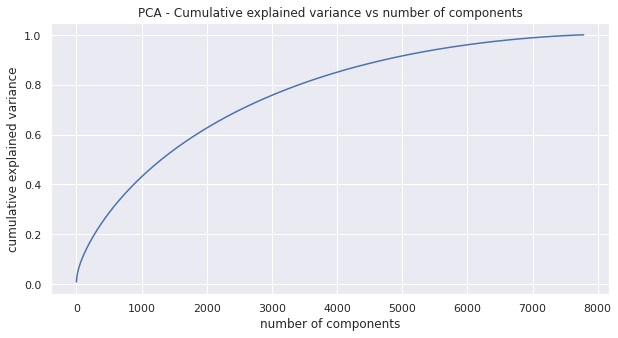

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**I have used Principal Component Analysis(PCA) for dimensionality reduction. PCA is the most popular technique for analyzing large datasets containing a high number of dimensions/features, increasing the interpretability of data while preserving the maximum amount of information.**

*   **We find that 100% of the variance is explained by about ~7400 components.**

*   **And more than 90% of variance is explained by 5000 components.**
*   **Hence to simplify the model, and reduce dimensionality, we can take the top 5000 components, which will still be able to capture more than 90% of variance.**

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=5000,random_state=42)
pca.fit(X)

PCA(n_components=5000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7787, 5000)

**We have succesfully reduced dimensionality of data from 20000 to 5000.**

## ***7. ML Model Implementation***

### ML Model - 1 - K-Means Clustering

**Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.**

Text(0, 0.5, 'WCSS')

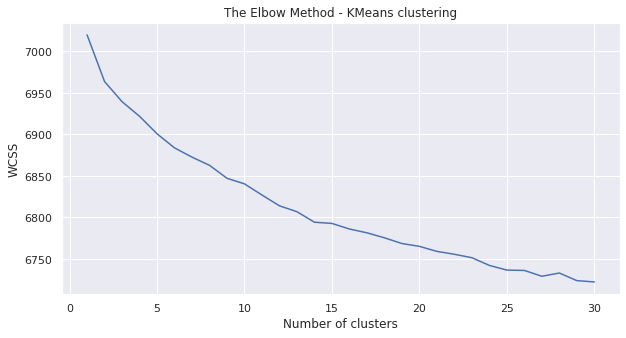

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.**

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f85bdd168e0>,
                 estimator=KMeans(n_clusters=13), k=(5, 14),
                 metric='silhouette', timings=False)

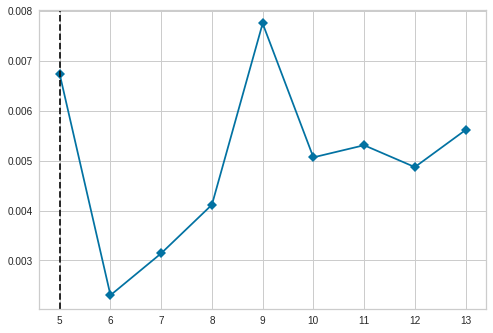

In [ ]:
# code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(5,14), metric='silhouette', timings=False
)

visualizer.fit(x_pca)        # Fit the data to the visualizer

In [ ]:
# Code to run Silhouette Visualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):

  for n_clusters in range(4,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(x_pca)
      centers = km.cluster_centers_

      score = silhouette_score(x_pca, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(x_pca) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 4, silhouette score is 0.0074860372427774284


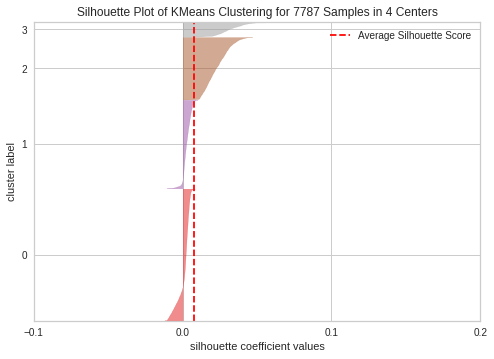

For n_clusters = 5, silhouette score is 0.006152779362310559


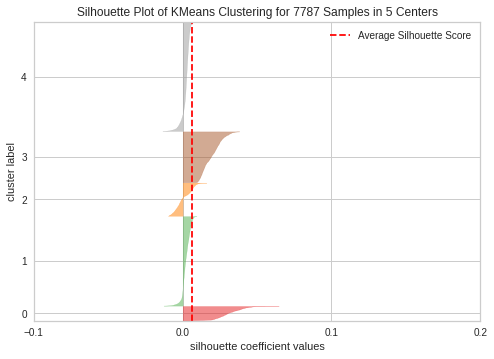

For n_clusters = 6, silhouette score is 0.0077328553644404295


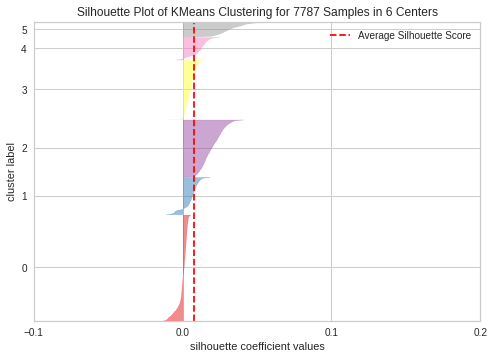

For n_clusters = 7, silhouette score is 0.006320208641016681


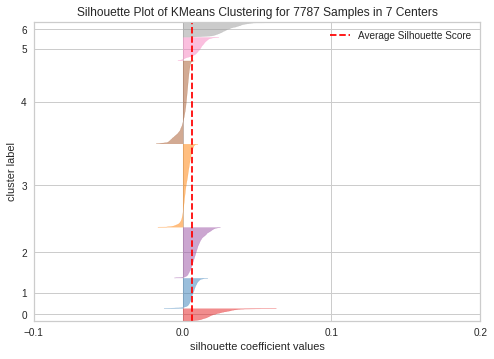

For n_clusters = 8, silhouette score is 0.003987286433242614


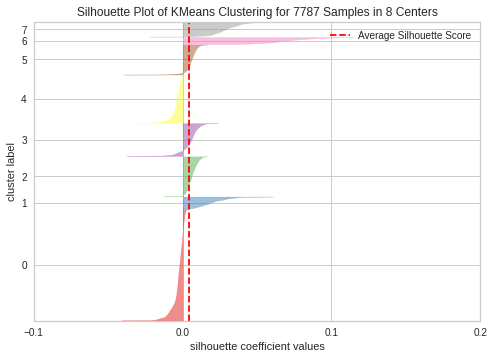

For n_clusters = 9, silhouette score is 0.0035709373298110215


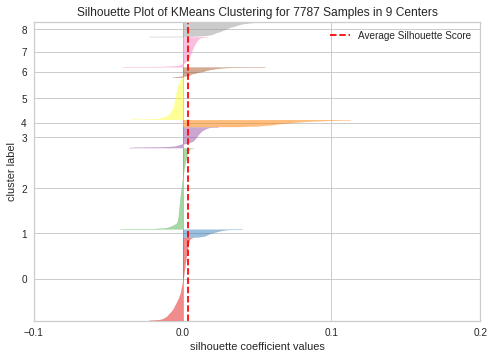

For n_clusters = 10, silhouette score is 0.005552032495232546


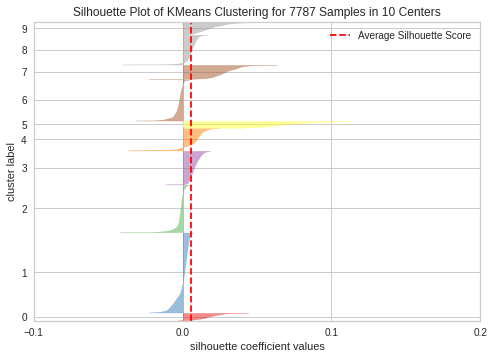

For n_clusters = 11, silhouette score is 0.007821500624591539


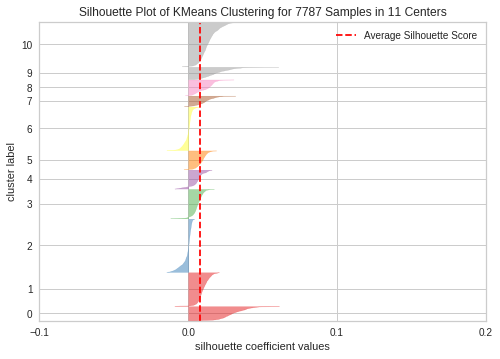

For n_clusters = 12, silhouette score is 0.005081708795950457


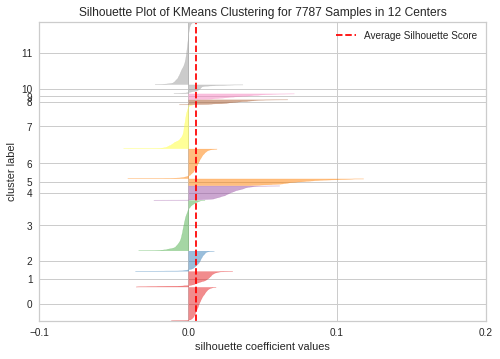

For n_clusters = 13, silhouette score is 0.006195455232513108


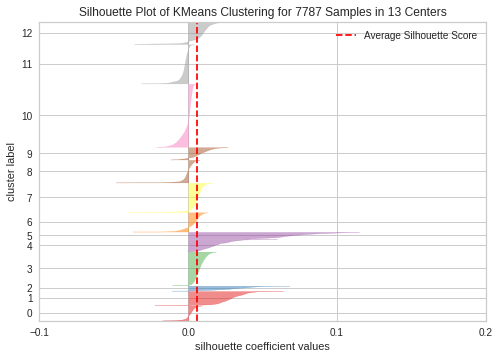

In [ ]:
silhouette_score_analysis(14)

**From above two plots, we get best number of clusters as 6 with a silhouette score of 0.007 at cluster number 6.**
##**Let's select the optimal value of K as 6 in K-Means clustering.**

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(x_pca)

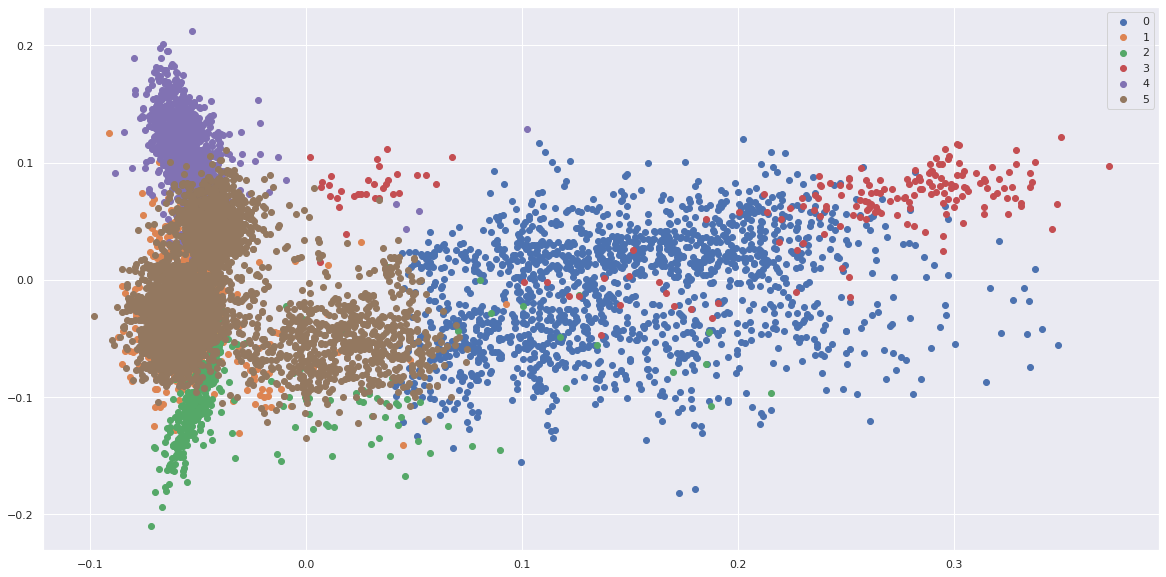

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

###I have used K-Means clustering to cluster the netflix Movie and TV Shows. I used Elbow method and Silhouette Score to evaluate optimal number of clusters and both gave 6 as optimal number of clusters.
### The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- ###  The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- ### Each point is closer to its own cluster center than to other cluster centers.

### Those two assumptions are the basis of the *k*-means model.



In [ ]:
# Labelling the dataset as per clusters
df1['cluster'] = kmeans.labels_

In [ ]:
# Checking the dataframe
df1.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                            filtered  cluster  
0  [future, elite, inhabit, island, paradise, far...        0  
1  [devastating, earthquake, hits, mexico, city, ...        5  
2  [army, recruit, found, dead, fellow, soldiers,...        5  
3  [postapocalyptic, world, ragdoll, robots, hide...        5  
4  [brilliant, group, students, become, cardcount...        5

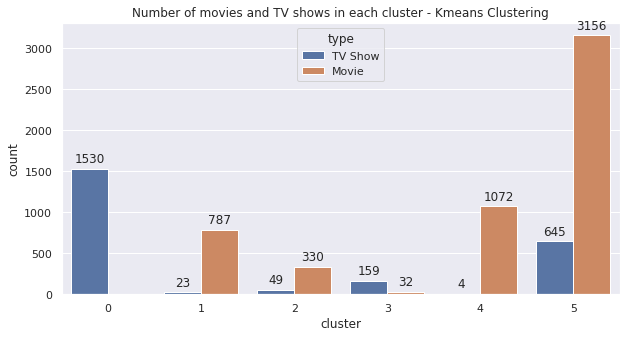

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**We have succcessfully built 6 clusters using K-Means clustering.**

## **Labelling the Clusters**

###**Wordcloud for Different Cclusters**

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                         background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

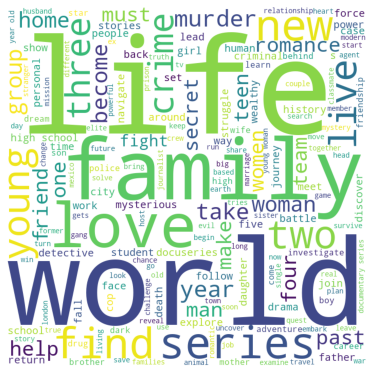

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: family, life, world, love, series, live, new etc.**

# Cluster 0: International TV Shows, TV Dramas

In [ ]:
# Dataframe for cluster 0
df1[df1['cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                title              director  \
0   TV Show                   3%                         
5   TV Show                   46           Serdar Akar   
11  TV Show                 1983                         
12  TV Show                 1994  Diego Enrique Osorno   
16  TV Show               Feb-09                         
26  TV Show             (Un)Well                         
38  TV Show  แผนร้ายนายเจ้าเล่ห์                         

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                                                    Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                          
26                                                             United States   
38  Chutavuth Pattarakampol, Sheranut Yusananda, N...                          

   rating                                          listed_in  \
0   TV-MA  International TV Shows, TV Dramas, TV Sci-Fi &...   
5   TV-MA    International TV Shows, TV Dramas, TV Mysteries   
11  TV-MA  Crime TV Shows, International TV Shows, TV Dramas   
12  TV-MA  Crime TV Shows, Docuseries, International TV S...   
16  TV-14                  International TV Shows, TV Dramas   
26  TV-MA                                         Reality TV   
38  TV-14  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
0   In a future where the elite inhabit an island ...  
5   A genetics professor experiments with a treatm...  
11  In this dark alt-history thriller, a naïve law...  
12  Archival video and new interviews examine Mexi...  
16  As a psychology professor faces Alzheimer's, h...  
26  This docuseries takes a deep dive into the luc...  
38  When two brothers fall for two sisters, they q...

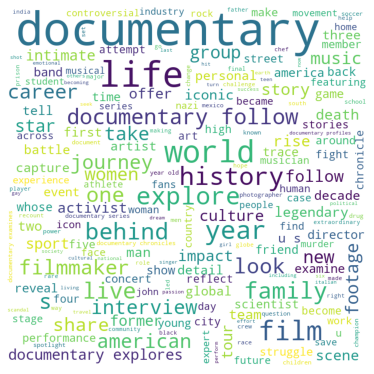

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1 description: Documentary, life, history, world, follow, family etc.**

# Cluster 1: Documentaries, Sports

In [ ]:
# Dataframe for cluster 1
df1[df1['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                          title  \
13  Movie                          2,215   
19  Movie                            '89   
25  Movie                       (T)ERROR   
28  Movie  #AnneFrank - Parallel Stories   
30  Movie               #cats_the_mewvie   
35  Movie                      #Rucker50   
52  Movie           100 Days Of Solitude   

                                  director  \
13                     Nottapon Boonprakob   
19                                           
25  Lyric R. Cabral, David Felix Sutcliffe   
28             Sabina Fedeli, Anna Migotto   
30                        Michael Margolis   
35                   Robert McCullough Jr.   
52                                           

                                  cast         country rating  \
13                  Artiwara Kongmalai        Thailand  TV-MA   
19  Lee Dixon, Ian Wright, Paul Merson  United Kingdom  TV-PG   
25                                       United States     NR   
28         Helen Mirren, Gengher Gatti           Italy  TV-14   
30                                              Canada  TV-14   
35                                       United States  TV-PG   
52                                               Spain  TV-MA   

                                            listed_in  \
13  Documentaries, International Movies, Sports Mo...   
19                                      Sports Movies   
25                                      Documentaries   
28                Documentaries, International Movies   
30                Documentaries, International Movies   
35                       Documentaries, Sports Movies   
52                Documentaries, International Movies   

                                          description  
13  This intimate documentary follows rock star Ar...  
19  Mixing old footage with interviews, this is th...  
25  This real-life look at FBI counterterrorism op...  
28  Through her diary, Anne Frank's story is retol...  
30  This pawesome documentary explores how our fel...  
35  This documentary celebrates the 50th anniversa...  
52  Spanish photographer José Díaz spends 100 days...

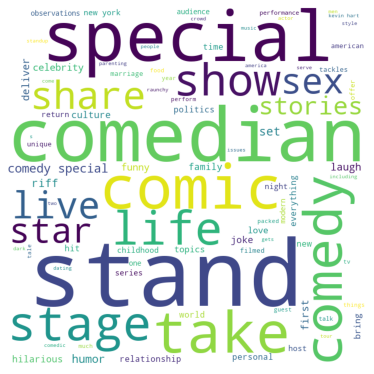

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2 description: stand, comic, comedy, comedian, stage, take, show, sex etc.**

# Cluster 2: Stand-Up-Comedy, Comedy

In [ ]:
# Dataframe for cluster 1
df1[df1['cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                          title  \
197  TV Show               A Little Help with Carol Burnett   
220    Movie                     A Russell Peters Christmas   
305    Movie            Adam Devine: Best Time of Our Lives   
307    Movie                        ADAM SANDLER 100% FRESH   
310    Movie                   Adel Karam: Live from Beirut   
312    Movie  Aditi Mittal: Things They Wouldn't Let Me Say   
320    Movie                      Afonso Padilha: Classless   

                         director  \
197                                 
220            Henry Sarwer-Foner   
305                     Jay Karas   
307                   Steve Brill   
310                                 
312                 Fazila Allana   
320  Junior Carelli, Rudge Campos   

                                                  cast        country rating  \
197  Carol Burnett, Russell Peters, Mark Cuban, Tar...  United States   TV-G   
220  Russell Peters, Pamela Anderson, Michael Bublé...         Canada     NR   
305                                        Adam Devine  United States  TV-MA   
307                                       Adam Sandler  United States  TV-MA   
310                                         Adel Karam  United States  TV-MA   
312                                       Aditi Mittal          India  TV-MA   
320                                     Afonso Padilha         Brazil  TV-MA   

                                     listed_in  \
197  Stand-Up Comedy & Talk Shows, TV Comedies   
220                            Stand-Up Comedy   
305                            Stand-Up Comedy   
307                            Stand-Up Comedy   
310                            Stand-Up Comedy   
312                            Stand-Up Comedy   
320                            Stand-Up Comedy   

                                           description  
197  Comedy icon Carol Burnett returns to TV with a...  
220  Inspired by the variety shows of the 1970s, "A...  
305  Frenetic comic Adam Devine talks teen awkwardn...  
307  From "Heroes" to "Ice Cream Ladies" – Adam San...  
310  From Casino du Liban, Lebanese actor and comed...  
312  Trailblazing comic Aditi Mittal mixes topical ...  
320  Brazilian comedian Afonso Padilha dives into h...

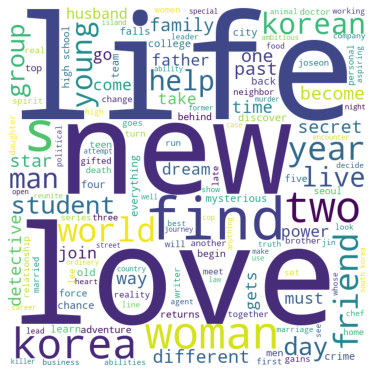

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in Cluster 3 description: life, love, new, korean, find, world, woman, friend etc.**

# Cluster 3: Korean, International TV Shows

In [ ]:
# Dataframe for cluster 1
df1[df1['cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                title       director  \
51   TV Show   100 Days My Prince                  
61   TV Show     12 Years Promise                  
91     Movie             26 Years  Geun-hyun Cho   
95   TV Show             28 Moons                  
191  TV Show     A Korean Odyssey                  
199  TV Show  A Love So Beautiful                  
202  TV Show     A Man Called God                  

                                                  cast      country rating  \
51   Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...  South Korea  TV-14   
61   So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...  South Korea  TV-14   
91   Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...  South Korea  TV-MA   
95   Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...  South Korea  TV-PG   
191  Lee Seung-gi, Cha Seung-won, Oh Yeon-seo, Lee ...  South Korea  TV-MA   
199  Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...  South Korea  TV-PG   
202  Song Il-gook, Han Chae-young, Kim Min-jong, Go...  South Korea  TV-14   

                                             listed_in  \
51   International TV Shows, Romantic TV Shows, TV ...   
61   International TV Shows, Korean TV Shows, Roman...   
91             Dramas, International Movies, Thrillers   
95   International TV Shows, Korean TV Shows, Roman...   
191  International TV Shows, Korean TV Shows, Roman...   
199  International TV Shows, Romantic TV Shows, TV ...   
202  Crime TV Shows, International TV Shows, Korean...   

                                           description  
51   Upon losing his memory, a crown prince encount...  
61   A pregnant teen is forced by her family to lea...  
91   Twenty-six years after the 1980 massacre at Gw...  
95   When her fiancé acts strangely upon receiving ...  
191  A self-serving mythical creature's bid for inv...  
199  Love is as tough as it is sweet for a lovestru...  
202  Raised in America, government agent Choi Kang-...

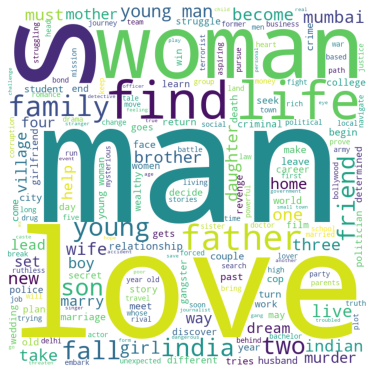

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: woman, man, love, find, life, family, friend, father etc.**

# Cluster 4: Horror, International Movies

In [ ]:
# Dataframe for cluster 1
df1[df1['cluster'] == 4][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                 title            director  \
6   Movie                   122     Yasir Al Yasiri   
8   Movie                   706       Shravan Kumar   
9   Movie                  1920        Vikram Bhatt   
18  Movie                15-Aug  Swapnaneel Jayakar   
20  Movie  ​​Kuch Bheege Alfaaz                Onir   
21  Movie          ​Goli Soda 2        Vijay Milton   
22  Movie    ​Maj Rati ​​Keteki   Santwana Bardoloi   

                                                 cast country rating  \
6   Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   Egypt  TV-MA   
8   Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   India  TV-14   
9   Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India  TV-MA   
18  Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India  TV-14   
20  Geetanjali Thapa, Zain Khan Durrani, Shray Rai...   India  TV-14   
21  Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   India  TV-14   
22  Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...   India  TV-14   

                                           listed_in  \
6                Horror Movies, International Movies   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   
18              Comedies, Dramas, Independent Movies   
20  Dramas, Independent Movies, International Movies   
21  Action & Adventure, Dramas, International Movies   
22                      Dramas, International Movies   

                                          description  
6   After an awful accident, a couple admitted to ...  
8   When a doctor goes missing, his psychiatrist w...  
9   An architect and his wife move into a castle t...  
18  On India's Independence Day, a zany mishap in ...  
20  After accidentally connecting over the Interne...  
21  A taxi driver, a gangster and an athlete strug...  
22  A successful writer returns to the town that l...

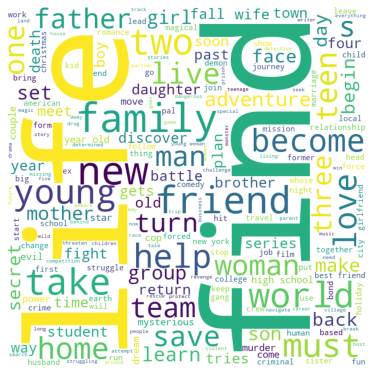

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in  Cluster 5: life, find, teen, team, world, family, help, home etc.**

# Cluster 5: Action & Adventure, Thrillers

In [ ]:
# Dataframe for cluster 1
df1[df1['cluster'] == 5][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type  title           director  \
1   Movie   7:19  Jorge Michel Grau   
2   Movie  23:59       Gilbert Chan   
3   Movie      9        Shane Acker   
4   Movie     21     Robert Luketic   
7   Movie    187     Kevin Reynolds   
10  Movie   1922       Zak Hilditch   
14  Movie   3022         John Suits   

                                                 cast        country rating  \
1   Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico  TV-MA   
2   Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore      R   
3   Elijah Wood, John C. Reilly, Jennifer Connelly...  United States  PG-13   
4   Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States  PG-13   
7   Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States      R   
10  Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...  United States  TV-MA   
14  Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...  United States      R   

                                            listed_in  \
1                        Dramas, International Movies   
2                 Horror Movies, International Movies   
3   Action & Adventure, Independent Movies, Sci-Fi...   
4                                              Dramas   
7                                              Dramas   
10                                  Dramas, Thrillers   
14    Independent Movies, Sci-Fi & Fantasy, Thrillers   

                                          description  
1   After a devastating earthquake hits Mexico Cit...  
2   When an army recruit is found dead, his fellow...  
3   In a postapocalyptic world, rag-doll robots hi...  
4   A brilliant group of students become card-coun...  
7   After one of his high school students attacks ...  
10  A farmer pens a confession admitting to his wi...  
14  Stranded when the Earth is suddenly destroyed ...

**We were able to build 6 clusters using K-Means Clustering namely:**

*   International TV Shows, TV Dramas

*   Documentaries, Sports
*   Stand-Up-Comedy, Comedy


*   International Movies, Korean




*   International Movies, Horror
*   Action & Adventure, Thrillers



### ML Model - 2 - Hierarchical Clustering

**Visualizing the dendrogram to decide on the optimal number of clusters for the Agglomerative (hierarchical) clustering algorithm:**

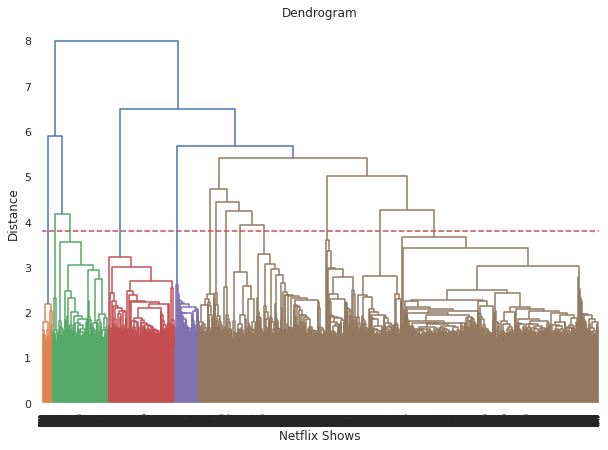

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

**At a distance of 3.8 units, 13 clusters can be built using the agglomerative clustering algorithm.**

###**Building 13 clusters using the Agglomerative clustering algorithm:**

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')  
y_hc = hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a Hierarchical cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

# Checking the dataframe
df1.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                            filtered  cluster  \
0  [future, elite, inhabit, island, paradise, far...        0   
1  [devastating, earthquake, hits, mexico, city, ...        5   
2  [army, recruit, found, dead, fellow, soldiers,...        5   
3  [postapocalyptic, world, ragdoll, robots, hide...        5   
4  [brilliant, group, students, become, cardcount...        5   

   hierarchical_cluster  
0                     1  
1                    12  
2                    10  
3                     0  
4                     0

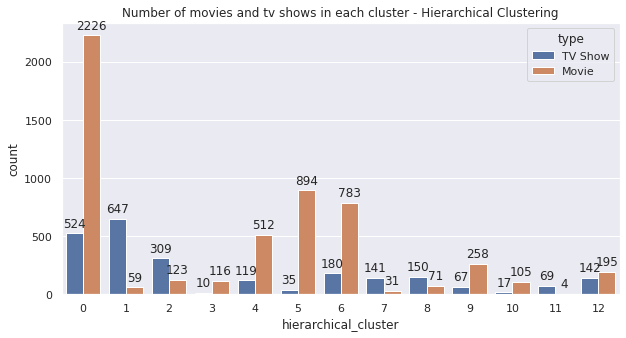

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Cluster 0 has highest number of shows.**

**Successfully built 13 clusters using the Agglomerative (hierarchical) clustering algorithm.**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###**Building WordClouds for different Clusters Built**

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
      
  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

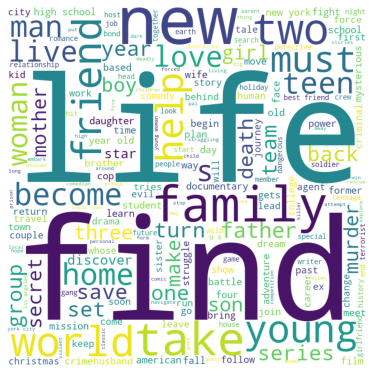

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Keywords observed in Cluster 0: life, find, family, new, world, young, friend etc.**

# Cluster 0: Dramas, Sci-Fi, Thrillers

In [ ]:
df1[df1['hierarchical_cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type title        director  \
3   Movie     9     Shane Acker   
4   Movie    21  Robert Luketic   
7   Movie   187  Kevin Reynolds   
8   Movie   706   Shravan Kumar   
10  Movie  1922    Zak Hilditch   
14  Movie  3022      John Suits   
19  Movie   '89                   

                                                 cast         country rating  \
3   Elijah Wood, John C. Reilly, Jennifer Connelly...   United States  PG-13   
4   Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   United States  PG-13   
7   Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   United States      R   
8   Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...           India  TV-14   
10  Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...   United States  TV-MA   
14  Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   United States      R   
19                 Lee Dixon, Ian Wright, Paul Merson  United Kingdom  TV-PG   

                                            listed_in  \
3   Action & Adventure, Independent Movies, Sci-Fi...   
4                                              Dramas   
7                                              Dramas   
8                 Horror Movies, International Movies   
10                                  Dramas, Thrillers   
14    Independent Movies, Sci-Fi & Fantasy, Thrillers   
19                                      Sports Movies   

                                          description  
3   In a postapocalyptic world, rag-doll robots hi...  
4   A brilliant group of students become card-coun...  
7   After one of his high school students attacks ...  
8   When a doctor goes missing, his psychiatrist w...  
10  A farmer pens a confession admitting to his wi...  
14  Stranded when the Earth is suddenly destroyed ...  
19  Mixing old footage with interviews, this is th...

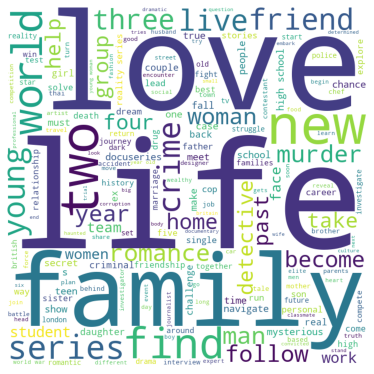

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Keywords observed in Cluster 1: life, love, family, live, friend, young, world etc.**

# Cluster 1: International TV Shows

In [ ]:
df1[df1['hierarchical_cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                title              director  \
0   TV Show                   3%                         
12  TV Show                 1994  Diego Enrique Osorno   
13    Movie                2,215   Nottapon Boonprakob   
16  TV Show               Feb-09                         
38  TV Show  แผนร้ายนายเจ้าเล่ห์                         
58  TV Show          100% Hotter                         
65    Movie              13 Sins          Daniel Stamm   

                                                 cast         country rating  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...          Brazil  TV-MA   
12                                                             Mexico  TV-MA   
13                                 Artiwara Kongmalai        Thailand  TV-MA   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                  TV-14   
38  Chutavuth Pattarakampol, Sheranut Yusananda, N...                  TV-14   
58  Daniel Palmer, Melissa Sophia, Karen Williams,...  United Kingdom  TV-14   
65  Mark Webber, Rutina Wesley, Devon Graye, Tom B...   United States      R   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
12  Crime TV Shows, Docuseries, International TV S...   
13  Documentaries, International Movies, Sports Mo...   
16                  International TV Shows, TV Dramas   
38  International TV Shows, Romantic TV Shows, TV ...   
58  British TV Shows, International TV Shows, Real...   
65                           Horror Movies, Thrillers   

                                          description  
0   In a future where the elite inhabit an island ...  
12  Archival video and new interviews examine Mexi...  
13  This intimate documentary follows rock star Ar...  
16  As a psychology professor faces Alzheimer's, h...  
38  When two brothers fall for two sisters, they q...  
58  A stylist, a hair designer and a makeup artist...  
65  A man agrees to appear on a game show with a $...

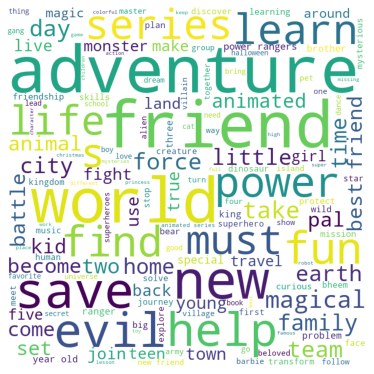

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**Keywords observed in Cluster 2: adventure, world, evil, help, save, friend, life, series etc.**

# Cluster 2: Kids'TV, TV Comedies

In [ ]:
df1[df1['hierarchical_cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                              title  \
111  TV Show                                            44 Cats   
162    Movie  A Christmas Special: Miraculous: Tales of Lady...   
233    Movie                              A StoryBots Christmas   
364  TV Show                                       Akbar Birbal   
396  TV Show                                           Alien TV   
411  TV Show                               All Hail King Julien   
412  TV Show                       All Hail King Julien: Exiled   

                        director  \
111                                
162                Thomas Astruc   
233  Evan Spiridellis, Jeff Gill   
364                                
396                                
411                                
412                                

                                                  cast  \
111  Sarah Natochenny, Suzy Myers, Simona Berman, E...   
162  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
233  Edward Asner, Judy Greer, Erin Fitzgerald, Fre...   
364          Kiku Sharda, Vishal Kotian, Delnaaz Irani   
396  Rob Tinkler, Julie Lemieux, John Cleland, Kyle...   
411  Danny Jacobs, Andy Richter, Henry Winkler, Kev...   
412  Danny Jacobs, Andy Richter, Kevin Michael Rich...   

                        country rating  \
111                       Italy  TV-Y7   
162  France, South Korea, Japan  TV-Y7   
233               United States   TV-Y   
364                       India   TV-G   
396                              TV-Y7   
411               United States  TV-Y7   
412                              TV-Y7   

                                        listed_in  \
111                                      Kids' TV   
162                                        Movies   
233            Children & Family Movies, Comedies   
364              Kids' TV, TV Comedies, TV Dramas   
396                         Kids' TV, TV Comedies   
411                         Kids' TV, TV Comedies   
412  Kids' TV, TV Action & Adventure, TV Comedies   

                                           description  
111  Paw-esome tales abound when singing furry frie...  
162  Parisian teen Marinette transforms herself int...  
233  Bo thinks her holiday gift-giving isn't good e...  
364  From battles of wit to fights for justice, Emp...  
396  Alien reporters Ixbee, Pixbee and Squee travel...  
411  In this Emmy winner for Outstanding Children's...  
412  Julien's been dethroned, but loyal friends and...

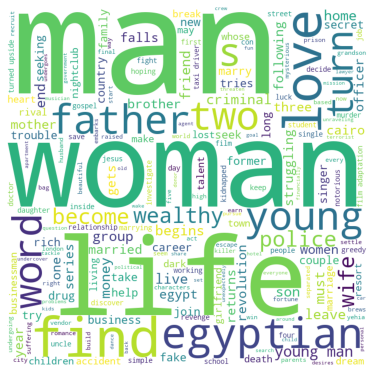

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**Keywords observed in Cluster 3: man, woman, life, love, father, egyptian, find, turn etc.**

# Cluster 3: International Movies, Dramas, Comedies

In [ ]:
df1[df1['hierarchical_cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                          title         director  \
6    Movie                            122  Yasir Al Yasiri   
103  Movie              30 Days of Luxury       Hani Hamdi   
204  Movie      A Mission in an Old Movie   Ahmad El-Badri   
280  Movie                      Abdo Mota                    
381  Movie            Alexandria ... Why?  Youssef Chahine   
382  Movie  Alexandria: Again and Forever  Youssef Chahine   
447  Movie                   Amar's Hands   Khaled Youssef   

                                                  cast         country rating  \
6    Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...           Egypt  TV-MA   
103  Taher Farouz, Sad Al-Saghir, Ahmad Faloks, Sol...           Egypt  TV-14   
204  Edward, Fifi Abdo, Lotfy Labib, Madeleine Mata...                  TV-MA   
280                                    Mohamed Ramadan           Egypt  TV-MA   
381  Naglaa Fathi, Farid Shawqy, Mohsen Mohiedine, ...  Egypt, Algeria  TV-MA   
382  Youssef Chahine, Yousra, Hussein Fahmy, Amr Ab...   France, Egypt  TV-MA   
447  Ghadah Abdulrazeq, Wafaa Amer, Hassan El Radda...           Egypt  TV-14   

                                            listed_in  \
6                 Horror Movies, International Movies   
103                    Comedies, International Movies   
204                    Comedies, International Movies   
280  Action & Adventure, Dramas, International Movies   
381      Classic Movies, Dramas, International Movies   
382      Classic Movies, Dramas, International Movies   
447                      Dramas, International Movies   

                                           description  
6    After an awful accident, a couple admitted to ...  
103  With the help of his friends, a man breaks out...  
204  A young man struggles with his overbearing mot...  
280  Following the mysterious death of his parents,...  
381  Living in Alexandria during World War II, an E...  
382  At the peak of his career, Yehia joins a hunge...  
447  To fulfill her husband’s dream to build a home...

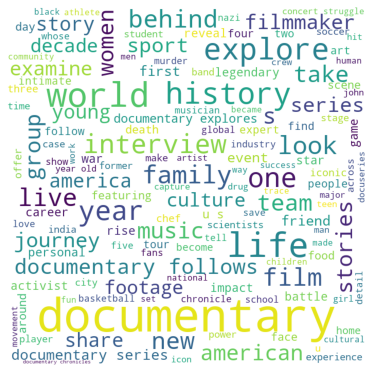

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**Keywords observed in Cluster 4: documentary, family, year, life, explore, history, world etc.**

# Cluster 4: International Movies, Documentaries

In [ ]:
df1[df1['hierarchical_cluster'] == 4][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                     title  \
25    Movie                                  (T)ERROR   
26  TV Show                                  (Un)Well   
30    Movie                          #cats_the_mewvie   
35    Movie                                 #Rucker50   
36    Movie                                   #Selfie   
37    Movie                                #Selfie 69   
56    Movie  100 Years: One Woman's Fight for Justice   

                                  director  \
25  Lyric R. Cabral, David Felix Sutcliffe   
26                                           
30                        Michael Margolis   
35                   Robert McCullough Jr.   
36                          Cristina Jacob   
37                          Cristina Jacob   
56                           Melinda Janko   

                                                 cast        country rating  \
25                                                     United States     NR   
26                                                     United States  TV-MA   
30                                                            Canada  TV-14   
35                                                     United States  TV-PG   
36  Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...        Romania  TV-MA   
37  Maia Morgenstern, Olimpia Melinte, Crina Semci...        Romania  TV-MA   
56                                                     United States  TV-14   

                                 listed_in  \
25                           Documentaries   
26                              Reality TV   
30     Documentaries, International Movies   
35            Documentaries, Sports Movies   
36  Comedies, Dramas, International Movies   
37  Comedies, Dramas, International Movies   
56                           Documentaries   

                                          description  
25  This real-life look at FBI counterterrorism op...  
26  This docuseries takes a deep dive into the luc...  
30  This pawesome documentary explores how our fel...  
35  This documentary celebrates the 50th anniversa...  
36  Two days before their final exams, three teen ...  
37  After a painful breakup, a trio of party-lovin...  
56  This documentary chronicles Elouise Cobell's l...

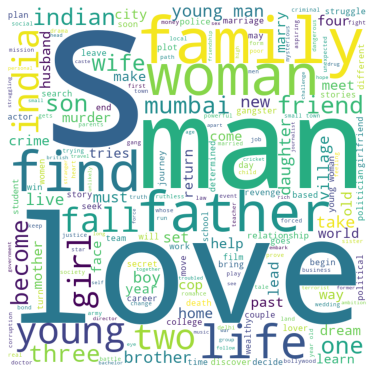

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Keywords observed in Cluster 5: love, man, father, woman, family, find, life etc.**

# Cluster 5: Indian, Dramas

In [ ]:
df1[df1['hierarchical_cluster'] == 5][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                 title            director  \
9   Movie                  1920        Vikram Bhatt   
18  Movie                15-Aug  Swapnaneel Jayakar   
20  Movie  ​​Kuch Bheege Alfaaz                Onir   
21  Movie          ​Goli Soda 2        Vijay Milton   
22  Movie    ​Maj Rati ​​Keteki   Santwana Bardoloi   
23  Movie           ​Mayurakshi         Atanu Ghosh   
59  Movie       1000 Rupee Note      Shrihari Sathe   

                                                 cast country rating  \
9   Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India  TV-MA   
18  Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India  TV-14   
20  Geetanjali Thapa, Zain Khan Durrani, Shray Rai...   India  TV-14   
21  Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   India  TV-14   
22  Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...   India  TV-14   
23  Soumitra Chatterjee, Prasenjit Chatterjee, Ind...   India  TV-14   
59  Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...   India  TV-14   

                                           listed_in  \
9     Horror Movies, International Movies, Thrillers   
18              Comedies, Dramas, Independent Movies   
20  Dramas, Independent Movies, International Movies   
21  Action & Adventure, Dramas, International Movies   
22                      Dramas, International Movies   
23                      Dramas, International Movies   
59                      Dramas, International Movies   

                                          description  
9   An architect and his wife move into a castle t...  
18  On India's Independence Day, a zany mishap in ...  
20  After accidentally connecting over the Interne...  
21  A taxi driver, a gangster and an athlete strug...  
22  A successful writer returns to the town that l...  
23  When a middle-aged divorcee returns to Kolkata...  
59  After randomly receiving a handsome political ...

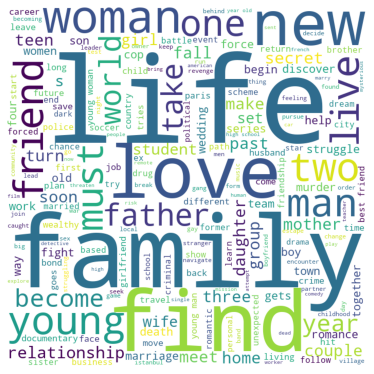

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**Keywords observed in cluster 6: life, family, love, woman, friend, young, live, man etc.**

# Cluster 6: International Romantic Thrillers

In [ ]:
df1[df1['hierarchical_cluster'] == 6][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                title         director  \
5   TV Show                   46      Serdar Akar   
11  TV Show                 1983                    
15    Movie               Oct-01   Kunle Afolayan   
17    Movie               22-Jul  Paul Greengrass   
31    Movie    #FriendButMarried    Rako Prijanto   
32    Movie  #FriendButMarried 2    Rako Prijanto   
40    Movie          Çarsi Pazar  Muharrem Gülmez   

                                                 cast  \
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...   
15  Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...   
17  Anders Danielsen Lie, Jon Øigarden, Jonas Stra...   
31  Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...   
32  Adipati Dolken, Mawar de Jongh, Sari Nila, Von...   
40  Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem G...   

                           country rating  \
5                           Turkey  TV-MA   
11           Poland, United States  TV-MA   
15                         Nigeria  TV-14   
17  Norway, Iceland, United States      R   
31                       Indonesia   TV-G   
32                       Indonesia   TV-G   
40                          Turkey  TV-14   

                                            listed_in  \
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
15            Dramas, International Movies, Thrillers   
17                                  Dramas, Thrillers   
31      Dramas, International Movies, Romantic Movies   
32      Dramas, International Movies, Romantic Movies   
40                     Comedies, International Movies   

                                          description  
5   A genetics professor experiments with a treatm...  
11  In this dark alt-history thriller, a naïve law...  
15  Against the backdrop of Nigeria's looming inde...  
17  After devastating terror attacks in Norway, a ...  
31  Pining for his high school crush for years, a ...  
32  As Ayu and Ditto finally transition from best ...  
40  The slacker owner of a public bath house ralli...

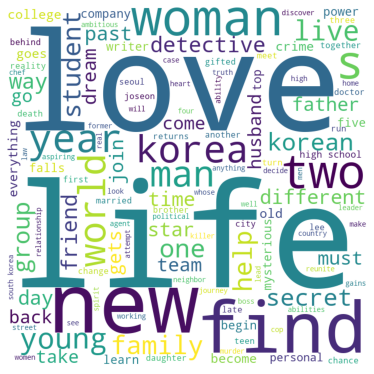

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Keywords observed in Cluster 7: love, life, korea, new, find, year, young etc.**

# Cluster 7: Korean TV Shows

In [ ]:
df1[df1['hierarchical_cluster'] == 7][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                title       director  \
51   TV Show   100 Days My Prince                  
61   TV Show     12 Years Promise                  
91     Movie             26 Years  Geun-hyun Cho   
95   TV Show             28 Moons                  
191  TV Show     A Korean Odyssey                  
199  TV Show  A Love So Beautiful                  
202  TV Show     A Man Called God                  

                                                  cast      country rating  \
51   Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...  South Korea  TV-14   
61   So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...  South Korea  TV-14   
91   Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...  South Korea  TV-MA   
95   Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...  South Korea  TV-PG   
191  Lee Seung-gi, Cha Seung-won, Oh Yeon-seo, Lee ...  South Korea  TV-MA   
199  Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...  South Korea  TV-PG   
202  Song Il-gook, Han Chae-young, Kim Min-jong, Go...  South Korea  TV-14   

                                             listed_in  \
51   International TV Shows, Romantic TV Shows, TV ...   
61   International TV Shows, Korean TV Shows, Roman...   
91             Dramas, International Movies, Thrillers   
95   International TV Shows, Korean TV Shows, Roman...   
191  International TV Shows, Korean TV Shows, Roman...   
199  International TV Shows, Romantic TV Shows, TV ...   
202  Crime TV Shows, International TV Shows, Korean...   

                                           description  
51   Upon losing his memory, a crown prince encount...  
61   A pregnant teen is forced by her family to lea...  
91   Twenty-six years after the 1980 massacre at Gw...  
95   When her fiancé acts strangely upon receiving ...  
191  A self-serving mythical creature's bid for inv...  
199  Love is as tough as it is sweet for a lovestru...  
202  Raised in America, government agent Choi Kang-...

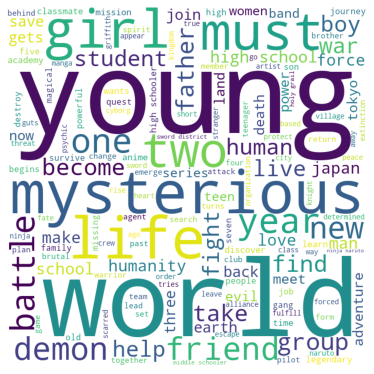

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

**Keywords observed in Cluster 8: young, world, mysterious, life, battle, girl, demon etc.**

# Cluster 8: Anime, Animation, Japanese

In [ ]:
df1[df1['hierarchical_cluster'] == 8][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                title  \
24   TV Show  ​SAINT SEIYA: Knights of the Zodiac   
107    Movie                           37 Seconds   
141  TV Show                               7SEEDS   
228    Movie                       A Silent Voice   
253    Movie                       A Whisker Away   
260  TV Show                             A.I.C.O.   
341  TV Show                           Aggretsuko   

                             director  \
24                                      
107                            Hikari   
141                                     
228                      Naoko Yamada   
253  Junichi Sato, Tomotaka Shibayama   
260                     Kazuya Murata   
341                                     

                                                  cast country rating  \
24   Bryson Baugus, Emily Neves, Blake Shepard, Pat...   Japan  TV-14   
107  Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Mak...   Japan  TV-MA   
141  Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...          TV-MA   
228  Miyu Irino, Saori Hayami, Aoi Yuki, Kensho Ono...   Japan  TV-14   
253  Mirai Shida, Natsuki Hanae, Hiroaki Ogi, Koich...   Japan  TV-PG   
260  Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...   Japan  TV-14   
341  Kaolip, Komegumi Koiwasaki, Maki Tsuruta, Soht...   Japan  TV-14   

                                             listed_in  \
24                Anime Series, International TV Shows   
107                       Dramas, International Movies   
141               Anime Series, International TV Shows   
228               Anime Features, International Movies   
253  Anime Features, Children & Family Movies, Inte...   
260               Anime Series, International TV Shows   
341               Anime Series, International TV Shows   

                                           description  
24   Seiya and the Knights of the Zodiac rise again...  
107  Trapped by society and familial obligations, a...  
141  Shy Natsu awakens as part of a group chosen to...  
228  A former class bully reaches out to the deaf g...  
253  A peculiar girl transforms into a cat to catch...  
260  Everything Aiko knew was a lie. Now she's join...  
341  Frustrated with her thankless office job, Rets...

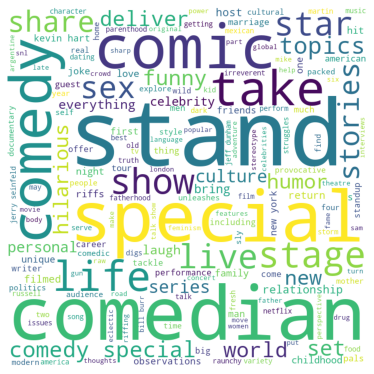

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

**Keywords observed in Cluster 9: stand, comedian, special, comedy, live, stage, life, star etc.**

# cluster 9: Stand-Up-Comedy

In [ ]:
df1[df1['hierarchical_cluster'] == 9][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                          title  \
220    Movie                     A Russell Peters Christmas   
284  TV Show                                Abnormal Summit   
312    Movie  Aditi Mittal: Things They Wouldn't Let Me Say   
320    Movie                      Afonso Padilha: Classless   
344    Movie                    Agustín Aristarán: Soy Rada   
370    Movie                 Alan Saldaña: Mi vida de pobre   
386    Movie                           Ali Wong: Baby Cobra   

                         director  \
220            Henry Sarwer-Foner   
284       Jung-ah Im, Seung-uk Jo   
312                 Fazila Allana   
320  Junior Carelli, Rudge Campos   
344                  Mariano Baez   
370        Raúl Campos, Jan Suter   
386                     Jay Karas   

                                                  cast        country rating  \
220  Russell Peters, Pamela Anderson, Michael Bublé...         Canada     NR   
284           Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo    South Korea  TV-PG   
312                                       Aditi Mittal          India  TV-MA   
320                                     Afonso Padilha         Brazil  TV-MA   
344                                  Agustín Aristarán      Argentina  TV-MA   
370                                       Alan Saldaña         Mexico  TV-MA   
386                                           Ali Wong  United States  TV-MA   

                                             listed_in  \
220                                    Stand-Up Comedy   
284  International TV Shows, Korean TV Shows, Stand...   
312                                    Stand-Up Comedy   
320                                    Stand-Up Comedy   
344                                    Stand-Up Comedy   
370                                    Stand-Up Comedy   
386                                    Stand-Up Comedy   

                                           description  
220  Inspired by the variety shows of the 1970s, "A...  
284  Led by a trio of Korean celebs, a multinationa...  
312  Trailblazing comic Aditi Mittal mixes topical ...  
320  Brazilian comedian Afonso Padilha dives into h...  
344  Argentine comedian Agustín "Radagast" Aristará...  
370  Mexican comic Alan Saldaña has fun with everyt...  
386  Ali Wong's stand up special delves into her se...

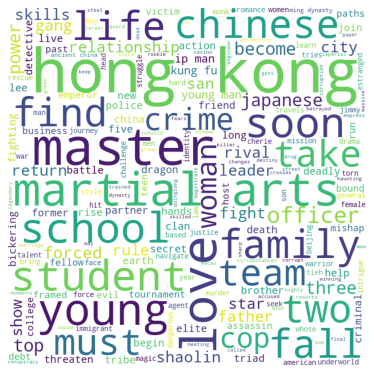

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

**Keywords observed in Cluster 10: hong kong, master, student, love, family, martial, school etc.**

# Cluster 10: Asian Movies

In [ ]:
df1[df1['hierarchical_cluster'] == 10][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                          title              director  \
2      Movie                          23:59          Gilbert Chan   
68     Movie                      14 Blades            Daniel Lee   
149    Movie               A Beautiful Life  Andrew Lau Wai-Keung   
187    Movie             A Home with A View            Herman Yau   
293    Movie                       Accident        Cheang Pou Soi   
294  TV Show           Accidentally in Love                         
423    Movie  All's Well, End's Well (2009)           Vincent Kok   

                                                  cast  \
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
68   Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...   
149  Qi Shu, Liu Ye, Anthony Wong Chau-Sang, Liang ...   
187  Francis Chun-Yu Ng, Louis Koo, Anita Yuen, Tat...   
293  Louis Koo, Richie Ren, Stanley Fung Sui-Fan, M...   
294  Junchen Guo, Yi Ning Sun, Yi Qin Zhao, Mu Xuan...   
423  Louis Koo, Sandra Ng Kwan Yue, Raymond Wong, R...   

                         country rating  \
2                      Singapore      R   
68   Hong Kong, China, Singapore      R   
149             China, Hong Kong  TV-14   
187                    Hong Kong  TV-MA   
293                    Hong Kong  TV-MA   
294                        China  TV-14   
423                    Hong Kong  TV-14   

                                             listed_in  \
2                  Horror Movies, International Movies   
68            Action & Adventure, International Movies   
149      Dramas, International Movies, Romantic Movies   
187                     Comedies, International Movies   
293                    International Movies, Thrillers   
294  International TV Shows, Romantic TV Shows, TV ...   
423    Comedies, International Movies, Romantic Movies   

                                           description  
2    When an army recruit is found dead, his fellow...  
68   In the age of the Ming Dynasty, Quinglong is t...  
149  After meeting under awkward circumstances, a g...  
187  When a neighbor blocks their view of the city ...  
293  A contract killer skilled at staging lethal ac...  
294  Rejecting the demands of her wealthy family, a...  
423  Bound by a family rule that forbids him from m...

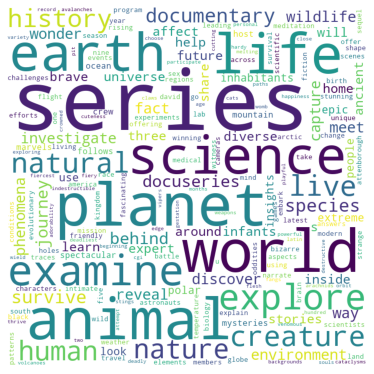

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

**Keywords observed in Cluster 11: series, planet, science, animal, creature, explore, world, earth etc.**

# Cluster 11: Docuseries, Science & Nature

In [ ]:
df1[df1['hierarchical_cluster'] == 11][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                title director  \
53   TV Show                           100 Humans            
137  TV Show                    72 Cutest Animals            
138  TV Show           72 Dangerous Animals: Asia            
139  TV Show  72 Dangerous Animals: Latin America            
140  TV Show          72 Dangerous Places to Live            
142  TV Show               9 Months That Made You            
256  TV Show                      A Year In Space            

                                       cast                   country rating  \
53   Zainab Johnson, Sammy Obeid, Alie Ward             United States  TV-14   
137                                                         Australia  TV-PG   
138                            Bob Brisbane                 Australia  TV-14   
139                            Bob Brisbane  Australia, United States  TV-14   
140                              Mitch Ryan                 Australia  TV-PG   
142                        Demetri Goritsas             United States  TV-PG   
256                             Scott Kelly             United States  TV-PG   

                                             listed_in  \
53                     Docuseries, Science & Nature TV   
137  Docuseries, International TV Shows, Science & ...   
138  Docuseries, International TV Shows, Science & ...   
139  Docuseries, International TV Shows, Science & ...   
140  Docuseries, International TV Shows, Science & ...   
142  British TV Shows, Docuseries, Science & Nature TV   
256  Docuseries, International TV Shows, Science & ...   

                                           description  
53   One hundred hardy souls from diverse backgroun...  
137  This series examines the nature of cuteness an...  
138  From fangs to claws to venomous stings, they a...  
139  Powerful cats, indestructible arachnids and fl...  
140  Get up close and personal with avalanches, fie...  
142  Witness the wonders of human gestation through...  
256  Two astronauts attempt to brave a life in Eart...

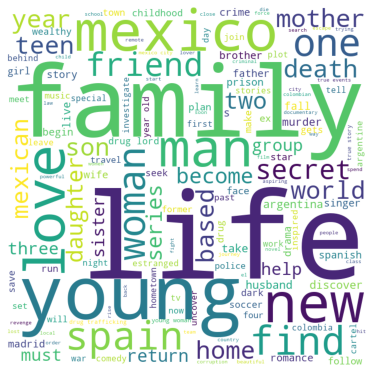

In [ ]:
# Wordcloud for cluster 12
hierarchical_worldcloud(12)

**Keyword observed in Cluster 12: life, family, young, spain, mexico, find, love etc.**

# Cluster 12: Europian Movies

In [ ]:
df1[df1['hierarchical_cluster'] == 12][['type','title','director','cast','country','rating','listed_in','description']].head(7)

type                                  title           director  \
1      Movie                                   7:19  Jorge Michel Grau   
39     Movie                         ¡Ay, mi madre!        Frank Ariza   
52     Movie                   100 Days Of Solitude                      
54     Movie                             100 Meters     Marcel Barrena   
74     Movie  1898: Our Last Men in the Philippines     Salvador Calvo   
92     Movie            27, el club de los malditos     Nicanor Loreti   
112  TV Show                                 45 rpm                      

                                                  cast          country  \
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...           Mexico   
39   Estefanía de los Santos, Secun de la Rosa, Ter...            Spain   
52                                                                Spain   
54   Dani Rovira, Karra Elejalde, Alexandra Jiménez...  Portugal, Spain   
74   Luis Tosar, Javier Gutiérrez, Álvaro Cervantes...            Spain   
92   Diego Capusotto, Sofía Gala, Daniel Aráoz, Wil...        Argentina   
112  Carlos Cuevas, Guiomar Puerta, Iván Marcos, Is...            Spain   

    rating                                          listed_in  \
1    TV-MA                       Dramas, International Movies   
39   TV-MA                     Comedies, International Movies   
52   TV-MA                Documentaries, International Movies   
54   TV-MA        Dramas, International Movies, Sports Movies   
74       R                       Dramas, International Movies   
92   TV-MA  Action & Adventure, Comedies, International Mo...   
112  TV-MA  International TV Shows, Romantic TV Shows, Spa...   

                                           description  
1    After a devastating earthquake hits Mexico Cit...  
39   When her estranged mother suddenly dies, a wom...  
52   Spanish photographer José Díaz spends 100 days...  
54   A man who is diagnosed with multiple sclerosis...  
74   While Spain relinquishes its last colonies, a ...  
92   After a musician dies under suspicious circums...  
112  In 1960s Madrid, music producer Guillermo Roja...

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used Agglomerative Clustering which is a type of Hierarchical Clustering

to cluster Netflix Movies and TV Shows.
### There are mainly two types of hierarchical clustering:

* ### Agglomerative hierarchical clustering 
Agglomerative clustering has a bottom up approach. We assign each data point to a different cluster and then at each iteration, we merge the closest pair of clusters and repeat this step until only one cluster is left.

* ### Divisive Hierarchical clustering
Divisive Hierarchical Clustering is opposite of Agglomerative Clustering and has a top to bottom approach. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning. Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point.

**The model can be used for text based clustering of Netflix Movies and TV Shows and for any other text based clustering as well. The model was able to build 13 clusters namely:**


*   Dramas, Sci-Fi, Thrillers
*   Kids'TV, TV comedies


*   International Movies, Dramas, Comedies

*   International Movies, Documentaries

*   Indian, Dramas

*   International Romantic Thrillers
*   Korean TV Shows


*   Anime, Animation, Japanese


*   Stand-Up-Comedy


*   Asian Movies


*   Docuseries, Science & Nature
*   Europian Movies









## ***8.*** ***Content Based Recommender System***



*   **We can build a simple content based recommender system based on the similarity of the shows.**

*   **If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that he/she likes.**
*   **To get the similarity score of the shows, we can use cosine similarity.**


*   **The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.**

C
o
s
(
θ
)
=
 A.B / |A|.|B|

                               


In [ ]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [ ]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['filtered'] = recommender_df['filtered'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['filtered'])


In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

(7787, 7787)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'Swades'
recommend_10('Swades')

If you liked 'Swades', you may also enjoy:



["What's Your Raashee?",
 'Lagaan',
 'Chaahat',
 'English Babu Desi Mem',
 'Limitless',
 'Rooting for Roona',
 'My Next Guest with David Letterman and Shah Rukh Khan',
 'Prince',
 'Paheli',
 'Kya Kehna']

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'The Umbrella Academy',
 'Prank Encounters',
 'Scream',
 'The Vampire Diaries',
 'Haunted',
 'Warrior Nun',
 'Anjaan: Special Crimes Unit',
 'Star-Crossed',
 'Nightflyers']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Giri / Haji',
 'The Murder Detectives',
 'I AM A KILLER: RELEASED',
 'Inside The Freemasons',
 'Stunt Science']

In [ ]:
# Recommendations for 'The Godfather'
recommend_10('The Godfather')

'Invalid Entry'

Invalid entry because 'The Godfather' is not present on Netflix.

In [ ]:
# Recommendations for 'The Departed'
recommend_10('The Departed')

If you liked 'The Departed', you may also enjoy:



['Calibre',
 'Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life',
 'Gangs of New York',
 'The Irishman',
 'Demetri Martin: The Overthinker',
 'The Irishman: In Conversation',
 'Martin Lawrence Live: Runteldat',
 'Big Kill',
 'The Talented Mr. Ripley',
 'Revenge of the Green Dragons']

In [ ]:
# Recommendations for '3 Idiots'
recommend_10('3 Idiots')

If you liked '3 Idiots', you may also enjoy:



['PK',
 'Ek Main Aur Ekk Tu',
 'Rang De Basanti',
 'No Entry',
 'Dil Chahta Hai',
 'War Chhod Na Yaar',
 'Sanju',
 'Kai Po Che!',
 'Pyaar Ka Punchnama 2',
 'Dil Dhadakne Do']

###**Our recommender system seems to be working really fine.**

# **Conclusion**

###In this project, I worked on a text clustering problem wherein I had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. The dataset contained about 7787 records, and 12 attributes. I began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

## **Conclusions from EDA**


*   **Netflix has more number of Movies(~ 70%) as compared to TV Shows(~ 30%) on Netflix.**

*   **United States, India and United Kingdom are top 3 countries of origin on Netflix.**
*   **Although, the number of shows which originate from United States are more than double as compared to India, but the most number of actors in top 40 actors( almost 50%) are Indian actors with Anupam Kher toppping the list.**


*   **Netflix has added movies on its platform with an average percentage increase of 1.72% each year and has added shows with an average percentage increase of 1.57% each year. So the hypothesis that Netflix has been focusing more on TV Shows as compared to the Movies is rejected and Netflix has been focusing almost equally on both type of content.**


*   **The majority of shows on Netflix are for Adults and young Adults.**


## **Conclusion from modelling**



*   **I decided to cluster the data based on the attributes: director, cast, country, genre, rating, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.**

*   **Through TFIDF Vectorization, I created a total of 20000 attributes.**

*   **I used Principal Component Analysis (PCA) to handle the high dimensionality with 20000 dimensions. 5000 components were able to capture more than 90% of variance, and hence, the number of components were restricted to 5000.**
*   **I first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.**


*   **Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 13. This was obtained after visualizing the dendrogram.**


*   **Agglomerative Clustering Algorithm gave more appropriate number of clusters as I felt the need of more number of clusters in K-Means clustering.**






*   **A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.**





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***